In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import os
from pandas.api.types import CategoricalDtype

import matplotlib.gridspec as gridspec
import matplotlib.patches
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors
import matplotlib as mpl
from matplotlib.path import Path
import math, bisect
import matplotlib.colors as mcolors
from pandas.plotting import parallel_coordinates
from matplotlib.ticker import PercentFormatter
import itertools

respath = '../gridpath82/scenarios/'
figpath = 'tnt1_figures/'
scs= ['prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re1_c2p1_tnt1',
      'prm15_fix_wcost_re2_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re2_c2p1_tnt1',
      'prm15_fix_wcost_re3_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re3_c2p1_tnt1',
      'prm15_fix_wcost_re4_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re4_c2p1_tnt1',
      'prm15_fix_wcost_re5_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re5_c2p1_tnt1',
      'prm15_fix_wcost_re6_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re6_c2p1_tnt1',
      'prm15_fix_wcost_re7_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re7_c2p1_tnt1',
      'prm15_fix_wcost_re8_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re8_c2p1_tnt1',
      'prm15_fix_wcost_re9_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re9_c2p1_tnt1',
      'prm15_fix_wcost_re10_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re10_c2p1_tnt1',
      'prm15_fix_wcost_re11_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re11_c2p1_tnt1',
      'prm15_fix_wcost_re12_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re12_c2p1_tnt1',
      'prm15_fix_wcost_re13_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re13_c2p1_tnt1',
      'prm15_fix_wcost_re14_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re14_c2p1_tnt1',
      'prm15_fix_wcost_re15_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re15_c2p1_tnt1',
      'prm15_fix_wcost_re16_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re16_c2p1_tnt1',
      'prm15_fix_wcost_re17_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re17_c2p1_tnt1',
      'prm15_fix_wcost_re18_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re18_c2p1_tnt1',
      'prm15_fix_wcost_re19_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re19_c2p1_tnt1',
      'prm15_fix_wcost_re20_c2p1_co2_cut90p_tnt1','prm15_fix_wcost_re20_c2p1_tnt1']

In [2]:
# all_costs_emissions = pd.DataFrame()
# for i in range(len(scs)):
#     # operations costs 2020-2050
#     op_costs = pd.read_csv(respath+scs[i]+'/results/costs_operations.csv')    
#     # multiply by timepoint_weight
#     op_costs['variable_om_cost_total'] = op_costs['variable_om_cost']*op_costs['timepoint_weight']*op_costs['number_of_hours_in_timepoint']
#     op_costs['fuel_cost_total'] = op_costs['fuel_cost'] * op_costs['timepoint_weight'] * op_costs['number_of_hours_in_timepoint']
#     op_costs['startup_cost_total'] = op_costs['startup_cost'] * op_costs['timepoint_weight'] * op_costs['number_of_hours_in_timepoint']
#     # check whether timepoint should be multiplied
#     op_costs_summary = op_costs.groupby(['period','load_zone'])[['variable_om_cost_total', 'fuel_cost_total', 'startup_cost_total']].sum()
#     # capacity costs 2020-2050
#     capacity_costs = pd.read_csv(respath+''+str(scs[i])+'/results/costs_capacity_all_projects.csv')    
#     capacity_costs_summary = capacity_costs.groupby(['period','load_zone'])[['capacity_cost']].sum()
#     # transmission capacity costs 2020-2050
#     transmission_costs = pd.read_csv(respath+''+str(scs[i])+'/results/costs_transmission_capacity.csv')
#     transmission_costs = transmission_costs.rename(columns={"load_zone_from": "load_zone"})
#     transmission_costs_summary = transmission_costs.groupby(['period','load_zone'])[['capacity_cost']].sum()
#     transmission_costs_summary.rename(columns = {'capacity_cost': 'transmission_capacity_cost'}, inplace=True)
#     # existing capital capacity costs
#     all_cap = pd.read_csv(respath+''+str(scs[i])+'/results/capacity_all.csv')
#     ecap = all_cap[all_cap.capacity_type == 'gen_spec']
#     ecap_tech = ecap.groupby(['period','technology','load_zone'])[['capacity_mw']].sum()
#     ecap_tech.reset_index(inplace=True)
#     # energy demand 
#     load = pd.read_csv(respath+''+str(scs[i])+'/results/load_balance.csv')
#     load['mwh'] = load['timepoint_weight'] * load['load_mw']
#     load = load.rename(columns={"zone": "load_zone"})
#     load_summary = load.groupby(['period','load_zone'])['mwh'].sum()
#     # emissions
#     emissions = pd.read_csv(respath+''+str(scs[i])+'/results/carbon_emissions_by_project.csv')
#     emissions['MtCO2'] = emissions['timepoint_weight'] * emissions['carbon_emissions_tons'] / 10**6  
#     emissions_summary = emissions.groupby(['period','load_zone'])['MtCO2'].sum()
#     # concatenate costs and sum
#     ce_df = pd.concat([op_costs_summary, capacity_costs_summary, transmission_costs_summary, load_summary, emissions_summary], axis=1)
#     cols_to_include=['variable_om_cost_total','fuel_cost_total','startup_cost_total','capacity_cost','transmission_capacity_cost']
    
#     ce_df['tCO2_per_mwh'] = ce_df['MtCO2']/ce_df['mwh']*10**6
#     ce_df['total_costs'] = ce_df.loc[:,ce_df.columns.isin(cols_to_include)].sum(axis=1)
#     ce_df['costs_per_mwh'] = ce_df['total_costs']/ce_df['mwh']
#     ce_df['var_om_cost_per_mwh'] = ce_df['variable_om_cost_total']/ce_df['mwh']
#     ce_df['fuel_cost_per_mwh'] = ce_df['fuel_cost_total']/ce_df['mwh']
#     ce_df['startup_cost_per_mwh'] = ce_df['startup_cost_total']/ce_df['mwh']
#     ce_df['capacity_cost_per_mwh'] = ce_df['capacity_cost']/ce_df['mwh']
#     ce_df['tx_capacity_cost_per_mwh'] = ce_df['transmission_capacity_cost']/ce_df['mwh']
#     # add scenario
#     ce_df['scs_id'] = scs[i]
#     ce_df.reset_index()
#     all_costs_emissions = pd.concat([all_costs_emissions, ce_df])
#     print(str(i))
# cost_emis_df = all_costs_emissions.reset_index()
# cost_emis_df = cost_emis_df.fillna(0)
# cost_emis_df.to_csv('costs_emissions_tnt1.csv',index=False)

In [3]:
# tech_mapper = {'Coal_Sub':'Coal','Coal_Sup':'Coal','Coal_IGCC':'Coal','Gas_CCGT':'Gas','Gas_OCGT':'Gas','Gas_ICE':'Gas',
#                'Oil':'Diesel','SolarPV':'Solar','Wind':'Wind','Geothermal':'Geothermal','Biomass':'Biomass','Diesel':'Diesel',
#                'Nuclear':'Nuclear','Hydro':'Hydro','Battery':'Battery'}

# list_hourly_disp_load = []
# for i in range(len(scs)):
#     ###Generation-TWh 2020-2050
#     alldisp1 = pd.read_csv(respath+scs[i]+'/results/dispatch_all.csv')
#     ###rename tech for plotting
#     alldisp1['technology'] = alldisp1.technology.map(tech_mapper)
#     alldisp1.loc[(alldisp1['technology'] == 'Battery')&(alldisp1['power_mw'] < 0),'technology'] = 'Battery_charge'
#     alldisp1.loc[(alldisp1['technology'] == 'Battery')&(alldisp1['power_mw'] >= 0),'technology'] = 'Battery_discharge'
#     alldisp1 = alldisp1.fillna(0)
#     ###system-wide dispatch by timepoints and tech
#     df_hourly_disp = alldisp1.groupby(['timepoint','technology','load_zone'])['power_mw'].sum()/1000
#     df_hourly_disp = df_hourly_disp.reset_index()
#     ###create pivot table
#     pt_hourly_disp = df_hourly_disp.pivot(index=['timepoint','load_zone'], columns='technology', values='power_mw')
#     ###calculate load by timepoints
#     load_bal = pd.read_csv(respath+scs[i]+'/results/load_balance.csv')
#     load_bal = load_bal.groupby(['timepoint','zone'])['load_mw'].sum()/1000
#     pt_hourly_disp['load'] = load_bal
#     ###calculate curtailment by timepoints
#     curt_df = pd.read_csv(respath+scs[i]+'/results/dispatch_variable.csv')
#     curt_df = curt_df.groupby(['timepoint','load_zone'])['total_curtailment_mw'].sum()/1000
#     pt_hourly_disp['curt'] = curt_df
#     ###include scenario name and append to list
#     pt_hourly_disp['scs'] = scs[i]
#     list_hourly_disp_load.append(pt_hourly_disp)
#     print(i)

# ### Concat pivot tables of all scenarios
# df_hourly_disp_load_allscs = pd.concat([list_hourly_disp_load[i] for i in range(len(scs))])
# df_hourly_disp_load_allscs = df_hourly_disp_load_allscs.fillna(0)
# df_hourly_disp_load_allscs.to_csv('hourly_dispatch_tnt1.csv')

# # Curtailment-VRE 2020-2050
# vre_curt = pd.DataFrame()
# for i in range(len(scs)):
#     disp_re = pd.read_csv(respath+scs[i]+'/results/dispatch_variable.csv')
#     disp_re['twh'] = disp_re['total_curtailment_mw']*disp_re['timepoint_weight']/(10**6)
#     curt_re = disp_re.groupby(['period','load_zone'])['twh'].sum()
#     curt_re = curt_re.reset_index()
#     curt_re['technology']='curt_vre'
#     curt_re['scs'] = scs[i]
#     vre_curt = pd.concat([vre_curt,curt_re])
#     print(str(i))
# vre_curt.to_csv('vre_curtailment_tnt1.csv', index=False)

# # Curtailment-Hydro 2020-2050
# hyd_curt = pd.DataFrame()
# for i in range(len(scs)):
#     disp_hydro = pd.read_csv(respath+scs[i]+'/results/dispatch_gen_hydro.csv')
#     disp_hydro['twh'] = disp_hydro['scheduled_curtailment_mw']*disp_hydro['timepoint_weight']/(10**6)
#     curt_hydro = disp_hydro.groupby(['period','load_zone'])['twh'].sum()
#     curt_hydro = curt_hydro.reset_index()
#     curt_hydro['technology']='curt_hydro'
#     curt_hydro['scs'] = scs[i]
#     hyd_curt = pd.concat([hyd_curt,curt_hydro])
#     print(str(i))
# hyd_curt.to_csv('scheduled_hydro_curtailment_tnt1.csv', index=False)

### Unmet Demand

In [4]:
# load_bal = pd.read_csv(respath+scs[0]+'/results/load_balance.csv')
# load_bal['month'] = load_bal['timepoint'].astype(str).str[4:6]
# load_bal = load_bal.set_index(['zone','period','month','timepoint'])
# load_bal[scs[0]] = load_bal['unserved_energy_mw']*load_bal['timepoint_weight']/(10**6)
# load_bal = pd.DataFrame(load_bal[scs[0]])
# for i in range(1,len(scs)):
#     temp_lb=pd.read_csv(respath+scs[i]+'/results/load_balance.csv')
#     temp_lb['month'] = temp_lb['timepoint'].astype(str).str[4:6]
#     temp_lb = temp_lb.set_index(['zone','period','month','timepoint'])
#     temp_lb[scs[i]] = temp_lb['unserved_energy_mw']*temp_lb['timepoint_weight']/(10**6)
#     temp_lb = pd.DataFrame(temp_lb[scs[i]])
#     load_bal = load_bal.merge(temp_lb, on=['zone','period','month','timepoint'])
# load_bal = load_bal.groupby(['period','month','zone']).sum().reset_index()
# load_bal.reset_index().to_csv('unmet_demand_tnt1.csv',index=False)

In [26]:
# # Monthly Curtailment-VRE 2020-2050
# disp_re = pd.read_csv(respath+scs[0]+'/results/dispatch_variable.csv')
# disp_re['twh'] = disp_re['total_curtailment_mw']*disp_re['timepoint_weight']/(10**6)
# vre_curt = disp_re.groupby(['period','horizon','load_zone'])['twh'].sum().reset_index()\
#                  .sort_values(by='horizon').rename(columns={'twh':scs[0]})
# for i in range(1,len(scs)):
#     temp_lb=pd.read_csv(respath+scs[i]+'/results/dispatch_variable.csv')
#     temp_lb['twh'] = temp_lb['total_curtailment_mw']*temp_lb['timepoint_weight']/(10**6)
#     temp_re = temp_lb.groupby(['period','horizon','load_zone'])['twh'].sum().reset_index()\
#                  .sort_values(by='horizon').rename(columns={'twh':scs[i]})
#     vre_curt = vre_curt.merge(temp_re, on=['period','horizon','load_zone'])
# vre_curt.to_csv('vre_curtailment_monthly_tnt1.csv',index=False)

### Transmission Operations

In [5]:
# list_exim_lz_allscs = []
# list_tot_exp_imp_allscs = []
# for i in range(len(scs)):
#     ## estimate total export/import where exports include transmission losses
#     exim = pd.read_csv(respath+scs[i]+'/results/imports_exports.csv')
#     exim['imports_twh'] = exim['imports_mw'] * exim['timepoint_weight']/(10**6)
#     exim['exports_twh'] = exim['exports_mw'] * exim['timepoint_weight']/(10**6)
#     import_lz_as_neg_exp = exim[(exim.exports_twh < 0)].groupby(['period','load_zone'])['exports_twh'].sum()*(-1)
#     import_lz_as_pos_imp = exim[(exim.imports_twh > 0)].groupby(['period','load_zone'])['imports_twh'].sum()
#     export_lz_as_pos_exp = exim[(exim.exports_twh > 0)].groupby(['period','load_zone'])['exports_twh'].sum()
#     export_lz_as_neg_imp = exim[(exim.imports_twh < 0)].groupby(['period','load_zone'])['imports_twh'].sum()*(-1)
#     df_exim_lz=pd.concat([import_lz_as_neg_exp,import_lz_as_pos_imp,export_lz_as_pos_exp, export_lz_as_neg_imp],axis=1)
#     df_exim_lz.columns = ['import_lz_as_neg_exp','import_lz_as_pos_imp','export_lz_as_pos_exp', 'export_lz_as_neg_imp']
#     df_exim_lz = df_exim_lz.fillna(0)
#     df_exim_lz['tot_imp_twh'] = df_exim_lz[['import_lz_as_neg_exp','import_lz_as_pos_imp']].sum(axis=1)
#     df_exim_lz['tot_exp_twh'] = df_exim_lz[['export_lz_as_pos_exp', 'export_lz_as_neg_imp']].sum(axis=1)
#     df_exim_lz['net_imp_twh'] = df_exim_lz['tot_imp_twh'] - df_exim_lz['tot_exp_twh'] ##matches with net_exim below
#     df_exim_lz['tot_trade_twh'] = df_exim_lz['tot_imp_twh'] + df_exim_lz['tot_exp_twh']
#     df_exim_lz['Scenario'] = scs[i]
#     ## estimate transmission losses and exclude from exports   
#     trans_op = pd.read_csv(respath+scs[i]+'/results/transmission_operations.csv')
#     trans_op['tx_loss_from_twh'] = trans_op['transmission_losses_lz_from']*trans_op['timepoint_weight']/(10**6)
#     trans_op['tx_loss_to_twh'] = trans_op['transmission_losses_lz_to']*trans_op['timepoint_weight']/(10**6)
#     from_to_losses = trans_op.groupby(['period', 'lz_from'])['tx_loss_to_twh'].sum()
#     to_from_losses = trans_op.groupby(['period', 'lz_to'])['tx_loss_from_twh'].sum()
#     df_exim_lz_with_losses = pd.concat([df_exim_lz, from_to_losses, to_from_losses],axis=1).fillna(0)
#     df_exim_lz_with_losses['tot_loss'] = df_exim_lz_with_losses[['tx_loss_to_twh','tx_loss_from_twh']].sum(axis=1)
#     df_exim_lz_with_losses['tot_exp_twh_excl_loss'] = df_exim_lz_with_losses['tot_exp_twh'] - df_exim_lz_with_losses['tot_loss']
#     df_exim_lz_with_losses = df_exim_lz_with_losses.reset_index()
#     ## separate columns with final export and import data
#     df_exim_lz1 = df_exim_lz_with_losses[['period','level_1','tot_imp_twh',\
#                                           'tot_exp_twh_excl_loss','net_imp_twh','Scenario']].copy()
#     df_exim_lz1.columns = ['period','load_zone','tot_imp_twh','tot_exp_twh_excl_loss','net_imp_twh','Scenario']
#     list_exim_lz_allscs.append(df_exim_lz1)
#     ## total export import for px plot
#     df_imp = df_exim_lz1[['period','load_zone']].copy()
#     df_exp = df_exim_lz1[['period','load_zone']].copy()
#     df_imp['trade'] = df_exim_lz1['tot_imp_twh']
#     df_imp['type'] = 'import'
#     df_exp['trade'] = df_exim_lz1['tot_exp_twh_excl_loss']
#     df_exp['type'] = np.where(df_exim_lz1["tot_exp_twh_excl_loss"] < 0, 'import', 'export')
#     df_exp["trade"] = df_exp["trade"].abs()
#     df_tot_exp_imp = pd.concat([df_imp, df_exp])
#     df_tot_exp_imp = df_tot_exp_imp.groupby(['type', 'period','load_zone'])['trade'].sum().reset_index()
#     df_tot_exp_imp['Scenario'] = scs[i]
#     list_tot_exp_imp_allscs.append(df_tot_exp_imp)
#     print(str(i))
    
# ## concat all scenarios
# df_exim_lz_allscs = pd.concat([list_exim_lz_allscs[i] for i in range(len(scs))])
# df_tot_exp_imp_allscs = pd.concat([list_tot_exp_imp_allscs[i] for i in range(len(scs))]).reset_index().drop(columns='index')
# df_tot_exp_imp_allscs['multiplier'] = np.where(df_tot_exp_imp_allscs["type"] == 'import', 1, -1)
# df_tot_exp_imp_allscs['trade_1'] = df_tot_exp_imp_allscs['trade'].multiply(df_tot_exp_imp_allscs['multiplier'])
# df_tot_exp_imp_allscs.round(decimals=5).to_csv('all_trade_tot_exim_by_lzyr_tnt1.csv', index=False)

# # country-level trade
# trade_list = []
# for i in range(len(scs)):
#     trans_op = pd.read_csv(respath+scs[i]+'/results/transmission_operations.csv')
#     trans_op['tx_flow_twh'] = trans_op['transmission_flow_mw']*trans_op['timepoint_weight']/(10**6)
#     trans_op['tx_loss_from_twh'] = trans_op['transmission_losses_lz_from']*trans_op['timepoint_weight']/(10**6)
#     trans_op['tx_loss_to_twh'] = trans_op['transmission_losses_lz_to']*trans_op['timepoint_weight']/(10**6)
#     trans_op['net_flow_twh'] = trans_op['tx_flow_twh'] + trans_op['tx_loss_from_twh'] - trans_op['tx_loss_to_twh']
#     trans_op['net_flow_twh'] = np.abs(trans_op['net_flow_twh'])
#     grp_trans = trans_op.groupby(['lz_from','lz_to','period']).sum().reset_index()\
#                         .drop(columns=['timepoint','timepoint_weight','number_of_hours_in_timepoint'])
#     grp_trans['scenario'] = scs[i]
#     trade_list.append(grp_trans[['lz_from','lz_to','period','net_flow_twh','scenario']])
    
# df_trade_list = pd.concat([trade_list[i] for i in range(len(scs))])
# df_trade_list.to_csv('total_trade_data_tnt1.csv', index=False)

# # TRADE BY TIMEPOINT

# list_exim_lz_allscs = []
# list_tot_exp_imp_allscs = []
# for i in range(len(scs)):
#     ## estimate total export/import where exports include transmission losses
#     exim = pd.read_csv(respath+scs[i]+'/results/imports_exports.csv')
#     exim['imports_twh'] = exim['imports_mw']/(10**6)
#     exim['exports_twh'] = exim['exports_mw']/(10**6)
#     import_lz_as_neg_exp = exim[(exim.exports_twh < 0)].groupby(['period','load_zone'])['exports_twh'].sum()*(-1)
#     import_lz_as_pos_imp = exim[(exim.imports_twh > 0)].groupby(['period','load_zone'])['imports_twh'].sum()
#     export_lz_as_pos_exp = exim[(exim.exports_twh > 0)].groupby(['period','load_zone'])['exports_twh'].sum()
#     export_lz_as_neg_imp = exim[(exim.imports_twh < 0)].groupby(['period','load_zone'])['imports_twh'].sum()*(-1)
#     df_exim_lz=pd.concat([import_lz_as_neg_exp,import_lz_as_pos_imp,export_lz_as_pos_exp, export_lz_as_neg_imp],axis=1)
#     df_exim_lz.columns = ['import_lz_as_neg_exp','import_lz_as_pos_imp','export_lz_as_pos_exp', 'export_lz_as_neg_imp']
#     df_exim_lz = df_exim_lz.fillna(0)
#     df_exim_lz['tot_imp_twh'] = df_exim_lz[['import_lz_as_neg_exp','import_lz_as_pos_imp']].sum(axis=1)
#     df_exim_lz['tot_exp_twh'] = df_exim_lz[['export_lz_as_pos_exp', 'export_lz_as_neg_imp']].sum(axis=1)
#     df_exim_lz['net_imp_twh'] = df_exim_lz['tot_imp_twh'] - df_exim_lz['tot_exp_twh'] ##matches with net_exim below
#     df_exim_lz['tot_trade_twh'] = df_exim_lz['tot_imp_twh'] + df_exim_lz['tot_exp_twh']
#     df_exim_lz['Scenario'] = scs[i]
#     ## estimate transmission losses and exclude from exports   
#     trans_op = pd.read_csv(respath+scs[i]+'/results/transmission_operations.csv')
#     trans_op['tx_loss_from_twh'] = trans_op['transmission_losses_lz_from']/(10**6)
#     trans_op['tx_loss_to_twh'] = trans_op['transmission_losses_lz_to']/(10**6)
#     from_to_losses = trans_op.groupby(['period', 'lz_from'])['tx_loss_to_twh'].sum()
#     to_from_losses = trans_op.groupby(['period', 'lz_to'])['tx_loss_from_twh'].sum()
#     df_exim_lz_with_losses = pd.concat([df_exim_lz, from_to_losses, to_from_losses],axis=1).fillna(0)
#     df_exim_lz_with_losses['tot_loss'] = df_exim_lz_with_losses[['tx_loss_to_twh','tx_loss_from_twh']].sum(axis=1)
#     df_exim_lz_with_losses['tot_exp_twh_excl_loss'] = df_exim_lz_with_losses['tot_exp_twh'] - df_exim_lz_with_losses['tot_loss']
#     df_exim_lz_with_losses = df_exim_lz_with_losses.reset_index()
#     ## separate columns with final export and import data
#     df_exim_lz1 = df_exim_lz_with_losses[['period','level_1','tot_imp_twh',\
#                                           'tot_exp_twh_excl_loss','net_imp_twh','Scenario']].copy()
#     df_exim_lz1.columns = ['period','load_zone','tot_imp_twh','tot_exp_twh_excl_loss','net_imp_twh','Scenario']
#     list_exim_lz_allscs.append(df_exim_lz1)
#     ## total export import for px plot
#     df_imp = df_exim_lz1[['period','load_zone']].copy()
#     df_exp = df_exim_lz1[['period','load_zone']].copy()
#     df_imp['trade'] = df_exim_lz1['tot_imp_twh']
#     df_imp['type'] = 'import'
#     df_exp['trade'] = df_exim_lz1['tot_exp_twh_excl_loss']
#     df_exp['type'] = np.where(df_exim_lz1["tot_exp_twh_excl_loss"] < 0, 'import', 'export')
#     df_exp["trade"] = df_exp["trade"].abs()
#     df_tot_exp_imp = pd.concat([df_imp, df_exp])
#     df_tot_exp_imp = df_tot_exp_imp.groupby(['type', 'period','load_zone'])['trade'].sum().reset_index()
#     df_tot_exp_imp['Scenario'] = scs[i]
#     list_tot_exp_imp_allscs.append(df_tot_exp_imp)
#     print(str(i))
    
# ## concat all scenarios
# df_exim_lz_allscs = pd.concat([list_exim_lz_allscs[i] for i in range(len(scs))])
# df_tot_exp_imp_allscs = pd.concat([list_tot_exp_imp_allscs[i] for i in range(len(scs))]).reset_index().drop(columns='index')
# df_tot_exp_imp_allscs['multiplier'] = np.where(df_tot_exp_imp_allscs["type"] == 'import', 1, -1)
# df_tot_exp_imp_allscs['trade_1'] = df_tot_exp_imp_allscs['trade'].multiply(df_tot_exp_imp_allscs['multiplier'])
# df_tot_exp_imp_allscs.round(decimals=5).to_csv('all_trade_tot_exim_by_lzyr_tnt1.csv', index=False)


# # country-level trade
# trade_list = []
# for i in range(len(scs)):
#     trans_op = pd.read_csv(respath+scs[i]+'/results/transmission_operations.csv')
#     trans_op['tx_flow_twh'] = trans_op['transmission_flow_mw']/(10**6)
#     trans_op['tx_loss_from_twh'] = trans_op['transmission_losses_lz_from']/(10**6)
#     trans_op['tx_loss_to_twh'] = trans_op['transmission_losses_lz_to']/(10**6)
#     trans_op['net_flow_twh'] = trans_op['tx_flow_twh'] + trans_op['tx_loss_from_twh'] - trans_op['tx_loss_to_twh']
#     trans_op['tx_line'] = trans_op['tx_line'].map({'Brazil_Uruguay_New':'Brazil_Uruguay','Brazil_Paraguay_New':'Brazil_Paraguay',
#                                                    'Argentina_Uruguay_New':'Argentina_Uruguay','Argentina_Paraguay_New':'Argentina_Paraguay',
#                                                    'Argentina_Chile_New':'Argentina_Chile','Argentina_Brazil_New':'Argentina_Brazil',
#                                                    'Brazil_Uruguay':'Brazil_Uruguay','Brazil_Paraguay':'Brazil_Paraguay',
#                                                    'Argentina_Uruguay':'Argentina_Uruguay','Argentina_Paraguay':'Argentina_Paraguay',
#                                                    'Argentina_Chile':'Argentina_Chile','Argentina_Brazil':'Argentina_Brazil'})
#     #trans_op['net_flow_twh'] = np.abs(trans_op['net_flow_twh'])
#     grp_trans = trans_op.groupby(['timepoint','tx_line','lz_from','lz_to','period']).sum().reset_index()\
#                         .drop(columns=['timepoint_weight','number_of_hours_in_timepoint'])
#     grp_trans['scenario'] = scs[i]
#     trade_list.append(grp_trans[['timepoint','tx_line','lz_from','lz_to','period','net_flow_twh','scenario']])
#     print(str(i))
    
# df_trade_list = pd.concat([trade_list[i] for i in range(len(scs))])
# df_trade_list.to_csv('total_trade_by_timepoint_net_tnt1.csv', index=False)

In [102]:
### GENERAL INFORMATION / VARIABLES ###
sc_names = pd.read_csv('../paper2_supp_scripts/processed_data/scenario_names.csv')
mercosur = ['Argentina','Brazil','Chile','Paraguay','Uruguay']
periods = [2020,2025,2030,2035,2040,2045,2050]

my_colours = ['#7DF5E0','#008770','#FF96BC','#CA1658','#FFCB31','#AD8200','#84C5FF','#0074DA'] # [green,pink,yellow,blue]
med_colours = ['#008770','#7DF5E0','#CA1658','#FF96BC','#AD8200','#FFCB31','#0074DA','#84C5FF']
palette = {'000':'#FF669E','001':'#D81B60','010':'#10EFC9','011':'#004D40','100':'#63B6FF','101':'#0074DA','110':'#FFC107','111':'#AD8200'}
cap_tech = ['Wind','Solar','Hydro','Fossil']
panels = ['Region-wide'] + mercosur

coal_color = '#343a40'
gas_color = '#6c757d'
hydro_color = '#2a648a'
solar_color = '#ef9226'
wind_color = '#8dc0cd'
nuclear_color = 'darkmagenta'
diesel_color = 'darkred'
other_color = '#f07167'
biomass_color = '#6ba661'
geothermal_color = 'slateblue'
battery_color = '#e7c41f'
pstorage_color = '#6a96ac'
trans_color = 'tan'
curtailment_color = 'red'
imports_color ='#D1FA04'
exports_color = '#FF88F8'

In [103]:
### data files
cost_df = pd.read_csv('costs_emissions_tnt1.csv')
hourly_disp = pd.read_csv('hourly_dispatch_tnt1.csv')
hydcurt = pd.read_csv('scheduled_hydro_curtailment_tnt1.csv')
vrecurt = pd.read_csv('vre_curtailment_tnt1.csv')
unmet = pd.read_csv('unmet_demand_tnt1.csv')
tot_exim = pd.read_csv('all_trade_tot_exim_by_lzyr_tnt1.csv')
trd_tp = pd.read_csv('total_trade_by_timepoint_net_tnt1.csv')
trd_tot = pd.read_csv('total_trade_data_tnt1.csv')

cost_df = cost_df[['scs_id','period','load_zone','variable_om_cost_total','fuel_cost_total','startup_cost_total',
                'capacity_cost','transmission_capacity_cost','mwh','MtCO2','total_costs']].groupby('scs_id').sum().reset_index()
cost_df['total_costs'] /= 1000000000
cost_df['capacity_cost'] /= 1000000000
cost_df['variable_om_cost_total'] /= 1000000000
cost_df['fuel_cost_total'] /= 1000000000
cost_df['startup_cost_total'] /= 1000000000
cost_df['emis_policy'] = cost_df.scs_id.str.contains('cut90p')*1
cost_df['exist_trd'] = cost_df.scs_id.str.contains('t1')*1
cost_df['op_char'] = cost_df.scs_id.str.split('_', expand=True)[3].str[2:].astype(int)
cost_df['fixed_pv'] = (cost_df.op_char > 10)*1
cost_df['pol'] = cost_df.emis_policy.astype(str) + cost_df.exist_trd.astype(str)
cost_df['group'] = cost_df.emis_policy.astype(str) + cost_df.exist_trd.astype(str) + cost_df.fixed_pv.astype(str)
cost_df.pol.replace({'00':'NoCut,Full','01':'NoCut,Lim','10':'90%Cut,Full','11':'90%Cut,Lim'},inplace=True)
difforder=CategoricalDtype(['NoCut,Lim','NoCut,Full','90%Cut,Lim','90%Cut,Full'], ordered=True)
cost_df['pol'] = cost_df['pol'].astype(difforder)


split_tx_cost_df = pd.read_csv('../paper2_supp_scripts/processed_data/split_tx_cost_df.csv')
split_tx_cost_df = split_tx_cost_df[(split_tx_cost_df.load_zone=='Region-wide')&(split_tx_cost_df.exist_trd==0)]
split_tx_cost_df['total_costs'] /= 1000000000
split_tx_cost_df['variable_om_cost_total'] /= 1000000000
split_tx_cost_df['fuel_cost_total'] /= 1000000000
split_tx_cost_df['startup_cost_total'] /= 1000000000

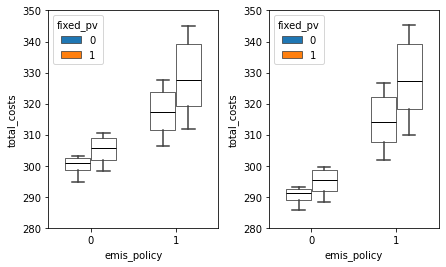

In [8]:
fig, ax = plt.subplots(1,2, figsize= (7,4))
plt.subplots_adjust(wspace=0.3)
g = sns.boxplot(data=cost_df,x='emis_policy',y='total_costs',hue='fixed_pv', width=0.6, ax=ax[0],
                medianprops={"linewidth": 1,'color':'k','label':'_median_','solid_capstyle':'butt'},saturation=1,
                flierprops={"marker": "o",'markerfacecolor':'none','markeredgecolor':'k','markersize':2},
                boxprops={"linewidth": .6,'edgecolor':'k','facecolor':'white'})

g2 = sns.boxplot(data=split_tx_cost_df,x='emis_policy',y='total_costs',hue='fixed_pv', width=0.6, ax=ax[1],
                medianprops={"linewidth": 1,'color':'k','label':'_median_','solid_capstyle':'butt'},saturation=1,
                flierprops={"marker": "o",'markerfacecolor':'none','markeredgecolor':'k','markersize':2},
                boxprops={"linewidth": .6,'edgecolor':'k','facecolor':'white'})
ax[0].set_ylim(280,350)
ax[1].set_ylim(280,350)
plt.show()
#plt.savefig(figpath + 'total_costs.png',dpi=300, bbox_inches='tight')

In [9]:
df_tn = hourly_disp[['scs','timepoint','load_zone','Battery_discharge','Battery_charge','curt']].copy(deep=True)
df_tn.timepoint = df_tn.timepoint.astype(str)
df_tn['Year'] = df_tn['timepoint'].str[:4].astype(int)
df_tn['Month'] = df_tn['timepoint'].str[4:6].astype(int)
df_tn['Hour'] = df_tn['timepoint'].str[6:].astype(int)

df_tn_sw_2050 = df_tn[df_tn.Year==2050].groupby(['scs','timepoint','Year','Month','Hour']).sum().reset_index()
df_tn_sw_2050 = df_tn_sw_2050.drop(columns=['scs']).groupby(['Year','Month','Hour']).mean().reset_index()

df_tn_sw_2050_dis_pt = df_tn_sw_2050.pivot(index='Month',columns='Hour',values='Battery_discharge')
df_tn_sw_2050_ch_pt = df_tn_sw_2050.pivot(index='Month',columns='Hour',values='Battery_charge')
df_tn_sw_2050_ch_pt *= -1
df_tn_sw_2050_curt_pt = df_tn_sw_2050.pivot(index='Month',columns='Hour',values='curt')

df_list = [df_tn_sw_2050_dis_pt,df_tn_sw_2050_ch_pt,df_tn_sw_2050_curt_pt]

df_dispatch_sw = hourly_disp.groupby(['timepoint','scs']).sum().reset_index().set_index('timepoint')
### averages for scenario groupings across all turbines: cut90p.t1.1axis, cut90p.t1.fixed, cut90p.tn.1axis, cut90p.tn.fixedyear,months,hours = '2050',['01','02','03','04','05','06','07','08','09','10','11','12'],['01','24']
df_dispatch_sw = hourly_disp.groupby(['timepoint','scs']).sum().reset_index()
df_dispatch_sw['op_char'] = df_dispatch_sw.scs.str.split('_', expand=True)[3].str[2:].astype(int)
df_dispatch_sw['month'] = df_dispatch_sw.timepoint.astype(str).str[4:6].astype(int)
group1 = df_dispatch_sw[(df_dispatch_sw.op_char<=10) & (df_dispatch_sw.month.isin([4,8,12]))]
group2 = df_dispatch_sw[(df_dispatch_sw.op_char>10) & (df_dispatch_sw.month.isin([4,8,12]))]
group1 = group1.drop(columns=['op_char','scs']).groupby(['timepoint','month']).mean().reset_index()
group1['group'] = 1
group2 = group2.drop(columns=['op_char','scs']).groupby(['timepoint','month']).mean().reset_index()
group2['group'] = 2
mean_disp = pd.concat([group1,group2])
mean_disp = mean_disp.set_index('timepoint')

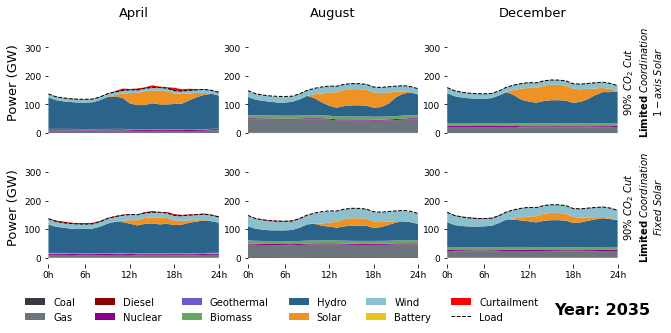

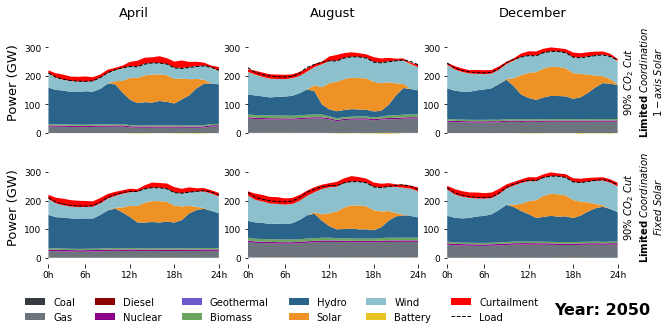

In [10]:
# HOURLY DISPATCH PLOTS (SI)

nrow,ncol=2,3
yrs = ['2035','2050']
for yr in yrs:
    fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*3.4,nrow*2.2), facecolor='white')
    fig.subplots_adjust(hspace=0.09,wspace=0.17)
    dfl = [[np.nan for i in range(ncol)] for j in range(nrow)]
    year,months,hours = yr,['04','08','12'],['01','24']
    mo_labs = ['April','August','December']
    grp_labs = [r"$90\%\ CO_{2}\ Cut$" + '\n' + r'$\bf{Limited}$' + r'$\ Coordination$' + '\n' + r'$1-axis\ Solar$',
                r"$90\%\ CO_{2}\ Cut$" + '\n' + r'$\bf{Limited}$' + r'$\ Coordination$' + '\n' + r'$Fixed\ Solar$',
                r"$90\%\ CO_{2}\ Cut$" + '\n' + r'$\bf{Full}$' + r'$\ Coordination$' + '\n' + r'$1-axis\ Solar$',
                r"$90\%\ CO_{2}\ Cut$" + '\n' + r'$\bf{Full}$' + r'$\ Coordination$' + '\n' + r'$Fixed\ Solar$',]
    clr1 = [coal_color, gas_color, diesel_color, nuclear_color, geothermal_color, biomass_color,
            hydro_color, solar_color, wind_color, battery_color, curtailment_color]
    clr2 = [battery_color]
    
    for i in range(nrow):
        for j in range(ncol):
            start_time, end_time = int(yr+months[j]+hours[0]), int(yr+months[j]+hours[1])
            dfl[i][j] = mean_disp[(mean_disp.group==i+1) & (mean_disp.index>=start_time) & (mean_disp.index<=end_time)].copy()
    
            # plot stackplot
            axs[i,j].stackplot(dfl[i][j].index,dfl[i][j].Coal,dfl[i][j].Gas,dfl[i][j].Diesel,dfl[i][j].Nuclear,
                                dfl[i][j].Geothermal,dfl[i][j].Biomass,dfl[i][j].Hydro,dfl[i][j].Solar,dfl[i][j].Wind,
                                dfl[i][j].Battery_discharge,dfl[i][j].curt,labels=['Coal','Gas','Diesel','Nuclear',
                                'Geothermal','Biomass','Hydro', 'Solar', 'Wind', 'Battery','Curtailment'],colors=clr1,alpha=1.0)
            axs[i,j].stackplot(dfl[i][j].index, dfl[i][j].Battery_charge, colors=clr2, alpha=1.0)
            axs[i,j].plot(dfl[i][j].index, dfl[i][j].load, '--k', lw=1, alpha=1.0, label='Load')
    
            axs[i,j].spines['top'].set_visible(False)
            axs[i,j].spines['right'].set_visible(False)
            axs[i,j].spines['bottom'].set_visible(False)
            axs[i,j].spines['left'].set_visible(False)
            axs[i,j].tick_params(axis='both', which='major', labelsize=9)
    
            axs[i,j].set_ylim(-20,380)
            axs[i,j].set_xlim(start_time,end_time)
            axs[i,j].set_yticks([0,100,200,300])
    
            if i < nrow-1:
                axs[i,j].set_xticks([])
            else:
                axs[i,j].set_xticks([start_time,start_time+5,start_time+11,start_time+17,start_time+23])
                axs[i,j].set_xticklabels(['0h', '6h', '12h', '18h', '24h'])
            if j == 0:
                axs[i,j].set_ylabel('Power (GW)', fontsize=13)
            if i == 0:
                axs[i,j].text(0.5, 1.1, mo_labs[j], size=13, rotation=0., ha='center', va='center', transform=axs[i,j].transAxes)
            if j == ncol-1:
                axs[i,j].text(1.15,0.5,grp_labs[i],size=10,rotation=90,ha='center',va='center',transform=axs[i,j].transAxes)
    
    handles, labels = axs[0,0].get_legend_handles_labels()
    axs[nrow-1,(ncol//2)-3].legend(handles[1:]+handles[0:1],labels[1:]+labels[0:1],loc='center',bbox_to_anchor=[0.2,-0.4],ncol=6,frameon=False)
    axs[nrow-1,(ncol//2)-1].annotate('Year: '+yr,xy=(2.97,-0.44),xycoords='axes fraction',annotation_clip=False,fontsize=16,fontweight='bold')
    
    plt.show()
    #fig.savefig(figpath + 'hourly_mean_dispatch_tnt1_{}.png'.format(yr),bbox_inches='tight',dpi=600)

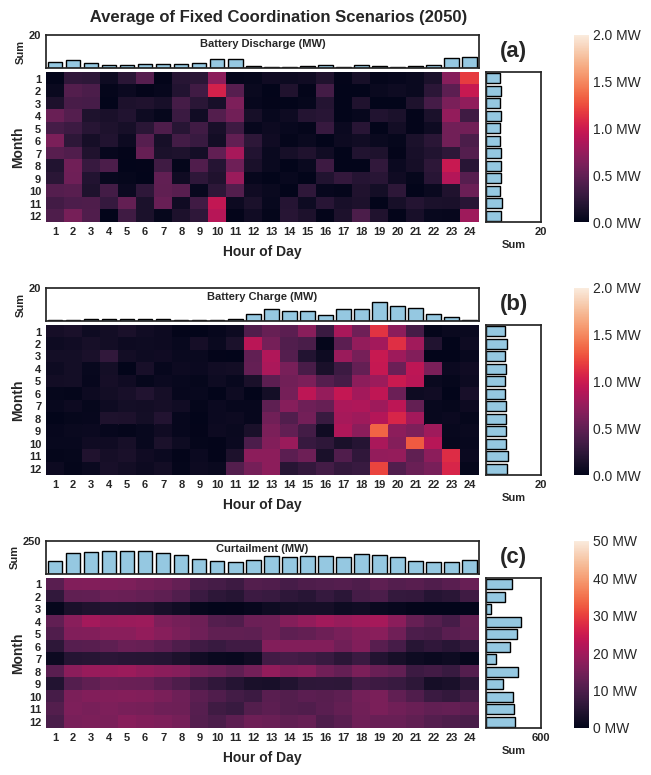

In [11]:
# hard-coded limits for plotting
monthly_lims, moticks, day_lims, dayticks, colorbar_maxes = [20,20,600], [20,20,600], [20,20,250], [20,20,250], [2,2,50]
hr, wr, ws, hs = [1,4.5], [8,1], 0.032, 0.045
labs = ['Battery Discharge (MW)','Battery Charge (MW)','Curtailment (MW)']

plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-white')
fig = plt.figure(constrained_layout=False, figsize = (7,9))
gs = fig.add_gridspec(3,2, width_ratios=[1,0.03], height_ratios=[1,1,1], wspace = .13, hspace= .35)
gs00 = gs[0,0].subgridspec(2,2, height_ratios=hr, width_ratios=wr, wspace=ws,hspace=hs)
gs10 = gs[1,0].subgridspec(2,2, height_ratios=hr, width_ratios=wr, wspace=ws,hspace=hs)
gs20 = gs[2,0].subgridspec(2,2, height_ratios=hr, width_ratios=wr, wspace=ws,hspace=hs)
gslist = [gs00,gs10,gs20]
ax_cb1,ax_cb2,ax_cb3=fig.add_subplot(gs[0,1]),fig.add_subplot(gs[1,1]),fig.add_subplot(gs[2,1])
cb_list = [ax_cb1,ax_cb2,ax_cb3]
panel_labels = ['(a)','(b)','(c)','(d)','(e)','(f)']
for y in range(3):
    df = df_list[y]
    hourly_values = df.sum(axis=0).reset_index().rename(columns={'Hour':'Hour',0:'Sum'})
    monthly_values = df.sum(axis=1).reset_index().rename(columns={'Month':'Month',0:'Sum'})
    ax_hm = fig.add_subplot(gslist[y][1,0])   #axes for heatmap
    ax_hr = fig.add_subplot(gslist[y][0,0])   #axes for hour bars
    ax_mo = fig.add_subplot(gslist[y][1,1])   #axes for month bars
    ax_lg = fig.add_subplot(gslist[y][0,1])
    ax_lg.axis('off')
    heatmap = sns.heatmap(df, ax=ax_hm, cbar_ax=cb_list[y], annot=False, vmin=0, vmax=colorbar_maxes[y], fmt='.0f',\
                          xticklabels=np.arange(1,25),yticklabels=np.arange(1,13))
    hour_bars = sns.barplot(x='Hour', y='Sum',data=hourly_values, ax=ax_hr, color='#88CCEE', edgecolor='k', orient='v')
    month_bars = sns.barplot(x='Sum', y='Month',data=monthly_values, ax=ax_mo, color='#88CCEE', edgecolor='k', orient='h')
    
    heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 8, fontweight='bold')
    heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 8, fontweight='bold')
    heatmap.set_xlabel('Hour of Day', fontsize=10, fontweight='bold',labelpad=6)
    heatmap.set_ylabel('Month', fontsize=10, fontweight='bold',labelpad=3)
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=10)
    t = cbar.get_ticks().tolist()
    if y<2:
        cbar.set_ticks(t)
        cbar.set_ticklabels(["{:.1f} MW".format(i) for i in t])
    else:
        cbar.set_ticks(t)
        cbar.set_ticklabels(["{:.0f} MW".format(i) for i in t])
    ax_hr.get_xaxis().set_visible(False)
    ax_hr.set_ylim(0,day_lims[y])
    ax_hr.set_yticks([dayticks[y]])
    ax_hr.set_yticklabels([str(dayticks[y])], fontsize=8, fontweight='bold')
    ax_hr.set_ylabel('Sum', fontsize=8, fontweight='bold',labelpad=2)
    ax_mo.get_yaxis().set_visible(False)
    ax_mo.set_xlim(0,monthly_lims[y])
    ax_mo.set_xticks([moticks[y]])
    ax_mo.set_xticklabels([str(moticks[y])], fontsize=8, fontweight='bold')
    ax_mo.set_xlabel('Sum', fontsize=8, fontweight='bold',labelpad=2)
    ax_hr.annotate(str(labs[y]),(.5,.74),xycoords='axes fraction',annotation_clip=False,
                        fontweight='bold',ha='center',va='center',fontsize=8)
    ax_lg.annotate(panel_labels[y],(.5,.5),xycoords='axes fraction',annotation_clip=False,
                        fontweight='bold',ha='center',va='center',fontsize=16)
    if y==0:
        ax_hr.set_title('       Average of Fixed Coordination Scenarios (2050)',fontweight='bold',fontsize=12,y=1.14)

plt.show()
#plt.savefig(figpath + 'heatmap_battery_curt_tnt1.png',facecolor='w',bbox_inches='tight',dpi=600)

In [12]:
hydcurt

period  load_zone        twh  technology  \
0       2020  Argentina   0.000000  curt_hydro   
1       2020     Brazil   2.075354  curt_hydro   
2       2020      Chile   0.000000  curt_hydro   
3       2020   Paraguay  49.109760  curt_hydro   
4       2020    Uruguay   0.000000  curt_hydro   
...      ...        ...        ...         ...   
1395    2050  Argentina   0.000000  curt_hydro   
1396    2050     Brazil   0.000000  curt_hydro   
1397    2050      Chile   0.000000  curt_hydro   
1398    2050   Paraguay   0.817894  curt_hydro   
1399    2050    Uruguay   0.104189  curt_hydro   

                                           scs  
0     prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  
1     prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  
2     prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  
3     prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  
4     prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  
...                                        ...  
1395            prm15_fix_wcost_re20_c2p1_tnt1  
1396            prm15_fix_wcost_re20_c2p1_tnt1  
1397            prm15_fix_wcost_re20_c2p1_tnt1  
1398            prm15_fix_wcost_re20_c2p1_tnt1  
1399            prm15_fix_wcost_re20_c2p1_tnt1  

[1400 rows x 5 columns]

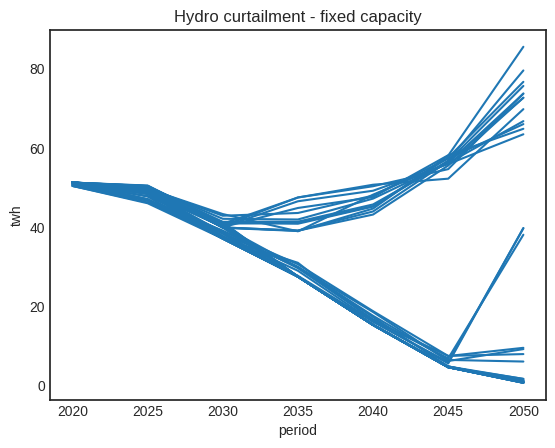

In [13]:
f = hydcurt.drop(columns=['technology','load_zone']).groupby(['scs','period']).sum().reset_index()
fig, ax = plt.subplots()
g = sns.lineplot(data=f, x='period',y='twh', units='scs', estimator=None)
plt.title('Hydro curtailment - fixed capacity')
plt.show()
#plt.savefig(figpath + 'hyd_curt_line_tnt1.png',facecolor='w',bbox_inches='tight',dpi=600)

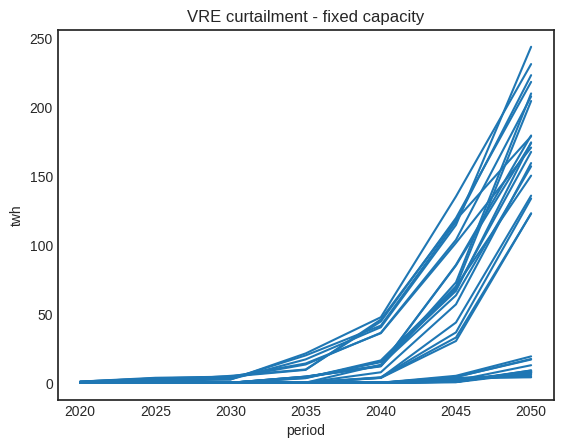

In [14]:
v = vrecurt.drop(columns=['technology','load_zone']).groupby(['scs','period']).sum().reset_index()
fig, ax = plt.subplots()
sns.lineplot(data=v,x='period',y='twh', units='scs', estimator=None)
plt.title('VRE curtailment - fixed capacity')
plt.show()
#plt.savefig(figpath + 'vre_curt_line_tnt1.png',facecolor='w',bbox_inches='tight',dpi=600)

In [34]:
vre_curt = pd.read_csv('vre_curtailment_monthly_tnt1.csv')
sys_vre_curt = vre_curt.groupby(['period','horizon']).sum().reset_index().drop(columns=['period','index'])
curt_df = sys_vre_curt.melt(id_vars='horizon', value_vars=scs)
curt_df['pol'] = curt_df.variable.str.contains('cut90p')

horizon                                  variable     value    pol
0      202001  prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  0.000000   True
1      202002  prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  0.000000   True
2      202003  prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  0.000000   True
3      202004  prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  0.106938   True
4      202005  prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  0.000000   True
...       ...                                       ...       ...    ...
3355   205008            prm15_fix_wcost_re20_c2p1_tnt1  1.503066  False
3356   205009            prm15_fix_wcost_re20_c2p1_tnt1  1.241615  False
3357   205010            prm15_fix_wcost_re20_c2p1_tnt1  1.453969  False
3358   205011            prm15_fix_wcost_re20_c2p1_tnt1  1.831256  False
3359   205012            prm15_fix_wcost_re20_c2p1_tnt1  1.845069  False

[3360 rows x 4 columns]

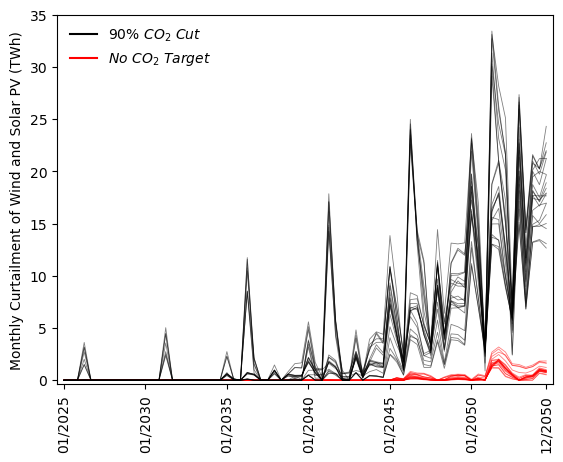

In [76]:
df1 = curt_df[curt_df.horizon>=202500].copy(deep=True)
df1['month'] = list(np.arange(12*6))*len(scs)

plt.rcParams.update(plt.rcParamsDefault)
fig, ax = plt.subplots()
g = sns.lineplot(data=df1,x='month',y='value',hue='pol',units='variable',estimator=None,
                 palette={True:'k',False:'r'},ax=ax,linewidth=0.6,alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1],labels=[r"${No\ CO_{2}\ Target}$",r"$90\%\ CO_{2}\ Cut$"][::-1],frameon=False,loc='upper left')
                            
plt.xticks([0,12,24,36,48,60,71], ['01/2025','01/2030','01/2035','01/2040','01/2045','01/2050','12/2050'],rotation=90)
plt.ylabel('Monthly Curtailment of Wind and Solar PV (TWh)')
plt.xlabel('')
plt.xlim(-1,72)
plt.ylim(-0.4,35)
plt.show()
#plt.savefig('vre_curt_line_mo_tnt1.png', dpi=400, bbox_inches='tight')

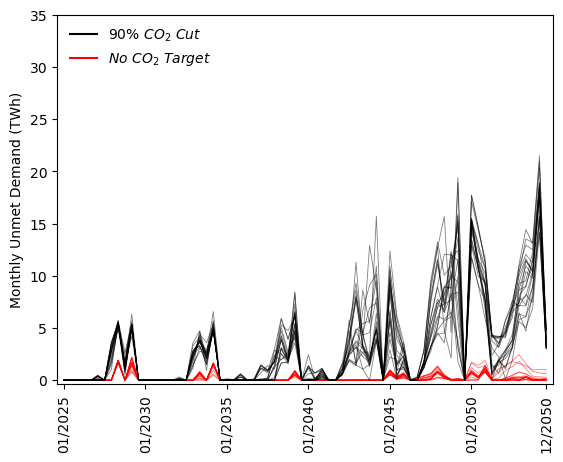

In [81]:
df1 = unmet[unmet.period>=2025].copy(deep=True)
df1['month'] = [i for i in np.arange(12*6) for j in np.arange(5)]
df1 = df1.groupby(['month']).sum().reset_index().drop(columns=['index'])
df1 = df1.melt(id_vars='month', value_vars=scs)
df1['pol'] = df1.variable.str.contains('cut90p')

plt.rcParams.update(plt.rcParamsDefault)
fig, ax = plt.subplots()
g = sns.lineplot(data=df1,x='month',y='value',hue='pol',units='variable',estimator=None,
                 palette={True:'k',False:'r'},ax=ax,linewidth=0.6,alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1],labels=[r"${No\ CO_{2}\ Target}$",r"$90\%\ CO_{2}\ Cut$"][::-1],frameon=False,loc='upper left')
                            
plt.xticks([0,12,24,36,48,60,71], ['01/2025','01/2030','01/2035','01/2040','01/2045','01/2050','12/2050'],rotation=90)
plt.ylabel('Monthly Unmet Demand (TWh)')
plt.xlabel('')
plt.xlim(-1,72)
plt.ylim(-0.4,35)
plt.show()
#plt.savefig('unmet_demand_mo_tnt1.png', dpi=400, bbox_inches='tight')

In [16]:
# using highest cost generation for unmet demand

In [17]:
# final_df = pd.DataFrame()
# for i in range(len(scs)):
#     # operations costs 2020-2050
#     op_costs = pd.read_csv(respath+scs[i]+'/results/costs_operations.csv')    
#     # multiply by timepoint_weight
#     op_costs['variable_om_cost_total'] = op_costs['variable_om_cost']*op_costs['timepoint_weight']*op_costs['number_of_hours_in_timepoint']
#     op_costs['fuel_cost_total'] = op_costs['fuel_cost'] * op_costs['timepoint_weight'] * op_costs['number_of_hours_in_timepoint']
#     op_costs['startup_cost_total'] = op_costs['startup_cost'] * op_costs['timepoint_weight'] * op_costs['number_of_hours_in_timepoint']
#     op_costs_summary = op_costs.groupby(['period','load_zone','timepoint'])[['variable_om_cost_total', 'fuel_cost_total', 'startup_cost_total']].sum()
#     # capacity costs
#     capacity_costs = pd.read_csv(respath+scs[i]+'/results/costs_capacity_all_projects.csv')    
#     capacity_costs_summary = capacity_costs.groupby(['period','load_zone'])[['capacity_cost']].sum()
#     capacity_costs_summary['capacity_cost'] /= 8760
    
#     # energy demand 
#     load = pd.read_csv(respath+''+str(scs[i])+'/results/load_balance.csv')
#     load['mwh'] = load['timepoint_weight'] * load['load_mw']
#     load = load.rename(columns={"zone": "load_zone"})
#     load_summary = load.groupby(['period','load_zone','timepoint'])['mwh'].sum()
#     # concatenate costs and sum
#     ce_df = pd.concat([op_costs_summary, load_summary], axis=1).reset_index()
#     ce_df = ce_df.merge(capacity_costs_summary.reset_index(),on=['period','load_zone'])
#     cols_to_include=['variable_om_cost_total','fuel_cost_total','startup_cost_total','capacity_cost']
    
#     ce_df['total_costs'] = ce_df.loc[:,ce_df.columns.isin(cols_to_include)].sum(axis=1)
#     ce_df['costs_per_mwh'] = ce_df['total_costs']/ce_df['mwh']
#     ce_df['var_om_cost_per_mwh'] = ce_df['variable_om_cost_total']/ce_df['mwh']
#     ce_df['fuel_cost_per_mwh'] = ce_df['fuel_cost_total']/ce_df['mwh']
#     ce_df['startup_cost_per_mwh'] = ce_df['startup_cost_total']/ce_df['mwh']
    
#     # add scenario
#     ce_df['scs_id'] = scs[i]
#     ce_df.reset_index()
#     final_df = pd.concat([final_df, ce_df])
#     print(str(i))
# cost_df = final_df.reset_index()
# cost_df = cost_df[cost_df['period'] > 2020].copy(deep=True)
# cost_df['month'] = cost_df['timepoint'].astype(str).str[4:6]
# cost_df_mo = cost_df[['period','scs_id','costs_per_mwh']].groupby(['period','scs_id']).max().reset_index()

# cost_df_mo.to_csv('maxcapgencost_tnt1.csv',index=False)

In [106]:
mgc = pd.read_csv('maxgencost_tnt1.csv')
mgc

period                                     scs_id  costs_per_mwh
0      2025  prm15_fix_wcost_re10_c2p1_co2_cut90p_tnt1     237.880946
1      2025             prm15_fix_wcost_re10_c2p1_tnt1     237.880946
2      2025  prm15_fix_wcost_re11_c2p1_co2_cut90p_tnt1     237.880946
3      2025             prm15_fix_wcost_re11_c2p1_tnt1     237.880946
4      2025  prm15_fix_wcost_re12_c2p1_co2_cut90p_tnt1     237.880946
..      ...                                        ...            ...
235    2050              prm15_fix_wcost_re7_c2p1_tnt1      24.362811
236    2050   prm15_fix_wcost_re8_c2p1_co2_cut90p_tnt1      39.854345
237    2050              prm15_fix_wcost_re8_c2p1_tnt1      35.989537
238    2050   prm15_fix_wcost_re9_c2p1_co2_cut90p_tnt1      39.849985
239    2050              prm15_fix_wcost_re9_c2p1_tnt1      47.987747

[240 rows x 3 columns]

In [107]:
unmet = pd.read_csv('unmet_demand_tnt1.csv')
unmet = unmet[unmet.period > 2020].copy(deep=True).drop(columns='index')
unmet = pd.melt(unmet,id_vars=['period','month','zone'],value_vars=scs)\
                .rename(columns={'zone':'load_zone','variable':'scs_id','value':'unmet_twh'})
unmet['unmet_twh'] = unmet['unmet_twh']*(1-(unmet['unmet_twh']<0))
unmet

period  month  load_zone                                    scs_id  \
0        2025      1  Argentina  prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1   
1        2025      1     Brazil  prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1   
2        2025      1      Chile  prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1   
3        2025      1   Paraguay  prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1   
4        2025      1    Uruguay  prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1   
...       ...    ...        ...                                       ...   
14395    2050     12  Argentina            prm15_fix_wcost_re20_c2p1_tnt1   
14396    2050     12     Brazil            prm15_fix_wcost_re20_c2p1_tnt1   
14397    2050     12      Chile            prm15_fix_wcost_re20_c2p1_tnt1   
14398    2050     12   Paraguay            prm15_fix_wcost_re20_c2p1_tnt1   
14399    2050     12    Uruguay            prm15_fix_wcost_re20_c2p1_tnt1   

       unmet_twh  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
14395        0.0  
14396        0.0  
14397        0.0  
14398        0.0  
14399        0.0  

[14400 rows x 5 columns]

In [108]:
short_cost = unmet.merge(mgc,on=['period','scs_id']).sort_values(by=['scs_id','period','load_zone'])
short_cost['added_cost_$M'] = short_cost['costs_per_mwh']*short_cost['unmet_twh']
short_cost = short_cost.groupby(['period','load_zone','scs_id']).sum().reset_index().drop(columns=['month','costs_per_mwh'])
short_cost = short_cost.sort_values(by='added_cost_$M')
short_cost.to_csv('cost_of_shortfalls.csv', index=False)
short_cost

period load_zone                                     scs_id  unmet_twh  \
599     2035   Uruguay              prm15_fix_wcost_re9_c2p1_tnt1   0.000000   
587     2035   Uruguay              prm15_fix_wcost_re3_c2p1_tnt1   0.000000   
588     2035   Uruguay   prm15_fix_wcost_re4_c2p1_co2_cut90p_tnt1   0.000000   
589     2035   Uruguay              prm15_fix_wcost_re4_c2p1_tnt1   0.000000   
590     2035   Uruguay   prm15_fix_wcost_re5_c2p1_co2_cut90p_tnt1   0.000000   
...      ...       ...                                        ...        ...   
58      2025    Brazil  prm15_fix_wcost_re19_c2p1_co2_cut90p_tnt1  16.759863   
64      2025    Brazil   prm15_fix_wcost_re2_c2p1_co2_cut90p_tnt1  13.899065   
1066    2050    Brazil   prm15_fix_wcost_re3_c2p1_co2_cut90p_tnt1  55.627244   
1050    2050    Brazil  prm15_fix_wcost_re15_c2p1_co2_cut90p_tnt1  61.863921   
1090    2050     Chile  prm15_fix_wcost_re15_c2p1_co2_cut90p_tnt1  62.677735   

      added_cost_$M  
599        0.000000  
587        0.000000  
588        0.000000  
589        0.000000  
590        0.000000  
...             ...  
58      3986.851973  
64      4278.406170  
1066    4383.994354  
1050    4573.042044  
1090    4633.199984  

[1200 rows x 5 columns]

In [109]:
short_cost.groupby(['scs_id']).sum().reset_index().drop(columns='period')

scs_id   unmet_twh  added_cost_$M
0   prm15_fix_wcost_re10_c2p1_co2_cut90p_tnt1  154.338635   11751.769755
1              prm15_fix_wcost_re10_c2p1_tnt1   11.116729    1469.045194
2   prm15_fix_wcost_re11_c2p1_co2_cut90p_tnt1  237.723195   12349.216102
3              prm15_fix_wcost_re11_c2p1_tnt1    9.556162    1384.085413
4   prm15_fix_wcost_re12_c2p1_co2_cut90p_tnt1  268.328152   15111.480562
5              prm15_fix_wcost_re12_c2p1_tnt1   14.309005    1673.819271
6   prm15_fix_wcost_re13_c2p1_co2_cut90p_tnt1  270.056633   17821.311426
7              prm15_fix_wcost_re13_c2p1_tnt1   11.810976    1161.965482
8   prm15_fix_wcost_re14_c2p1_co2_cut90p_tnt1  274.893260   15063.130108
9              prm15_fix_wcost_re14_c2p1_tnt1   14.989239    1509.448717
10  prm15_fix_wcost_re15_c2p1_co2_cut90p_tnt1  264.341051   20974.764600
11             prm15_fix_wcost_re15_c2p1_tnt1   13.140379    1488.209278
12  prm15_fix_wcost_re16_c2p1_co2_cut90p_tnt1  242.808525   12875.067365
13             prm15_fix_wcost_re16_c2p1_tnt1    9.762280    1408.039819
14  prm15_fix_wcost_re17_c2p1_co2_cut90p_tnt1  251.065011   14637.767337
15             prm15_fix_wcost_re17_c2p1_tnt1   13.241950    1475.374158
16  prm15_fix_wcost_re18_c2p1_co2_cut90p_tnt1  265.034183   14621.454927
17             prm15_fix_wcost_re18_c2p1_tnt1   12.767461    1325.492156
18  prm15_fix_wcost_re19_c2p1_co2_cut90p_tnt1  259.939327   15900.718506
19             prm15_fix_wcost_re19_c2p1_tnt1   24.669650    1552.190813
20   prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  151.335927   11773.840163
21              prm15_fix_wcost_re1_c2p1_tnt1   11.815280    1643.652184
22  prm15_fix_wcost_re20_c2p1_co2_cut90p_tnt1  227.802436   13693.643838
23             prm15_fix_wcost_re20_c2p1_tnt1    8.937315    1329.861885
24   prm15_fix_wcost_re2_c2p1_co2_cut90p_tnt1  194.781724   16242.187085
25              prm15_fix_wcost_re2_c2p1_tnt1   11.798156    1402.825706
26   prm15_fix_wcost_re3_c2p1_co2_cut90p_tnt1  215.840978   18793.462456
27              prm15_fix_wcost_re3_c2p1_tnt1   22.919398    1813.066712
28   prm15_fix_wcost_re4_c2p1_co2_cut90p_tnt1  200.949915   14271.329596
29              prm15_fix_wcost_re4_c2p1_tnt1   13.922591    1742.994018
30   prm15_fix_wcost_re5_c2p1_co2_cut90p_tnt1  181.915962   16120.186963
31              prm15_fix_wcost_re5_c2p1_tnt1   12.466291    1458.588376
32   prm15_fix_wcost_re6_c2p1_co2_cut90p_tnt1  164.084957   12830.332211
33              prm15_fix_wcost_re6_c2p1_tnt1   12.208654    1532.280136
34   prm15_fix_wcost_re7_c2p1_co2_cut90p_tnt1  168.832825   12592.764095
35              prm15_fix_wcost_re7_c2p1_tnt1   12.121427    1452.410564
36   prm15_fix_wcost_re8_c2p1_co2_cut90p_tnt1  211.161688   14791.034303
37              prm15_fix_wcost_re8_c2p1_tnt1   18.220227    1661.146749
38   prm15_fix_wcost_re9_c2p1_co2_cut90p_tnt1  213.625447   14896.593279
39              prm15_fix_wcost_re9_c2p1_tnt1   13.916108    1565.040529

In [110]:
costs_df = pd.read_csv('costs_emissions_tnt1.csv')
costs_df

period  load_zone  variable_om_cost_total  fuel_cost_total  \
0       2020  Argentina            9.403791e+08     1.315519e+09   
1       2020     Brazil            3.302340e+09     6.684639e+09   
2       2020      Chile            3.218281e+08     1.346618e+09   
3       2020   Paraguay            3.275001e+08     0.000000e+00   
4       2020    Uruguay            4.097329e+07     8.389764e+07   
...      ...        ...                     ...              ...   
1395    2050  Argentina            1.862575e+09     4.254988e+09   
1396    2050     Brazil            5.317628e+09     1.306875e+10   
1397    2050      Chile            9.037029e+08     2.709757e+09   
1398    2050   Paraguay            3.276802e+08     3.210179e+06   
1399    2050    Uruguay            3.599808e+07     4.331214e+07   

      startup_cost_total  capacity_cost  transmission_capacity_cost  \
0           3.315753e+06   7.184157e+08                         0.0   
1           0.000000e+00   2.606094e+09                         0.0   
2           0.000000e+00   7.526559e+08                         0.0   
3           0.000000e+00   3.046485e+06                         0.0   
4           1.230116e+06   1.541036e+08                         0.0   
...                  ...            ...                         ...   
1395        0.000000e+00   9.664879e+09                         0.0   
1396        0.000000e+00   3.452371e+10                         0.0   
1397        0.000000e+00   2.741136e+09                         0.0   
1398        4.282328e+05   1.535247e+09                         0.0   
1399        8.571837e+05   1.324515e+09                         0.0   

               mwh       MtCO2  tCO2_per_mwh   total_costs  costs_per_mwh  \
0     1.365405e+08   31.936468      0.233897  2.977630e+09      21.807673   
1     6.568239e+08   47.784042      0.072750  1.259307e+10      19.172680   
2     8.292291e+07   21.829983      0.263256  2.421102e+09      29.197021   
3     2.220374e+07    0.000000      0.000000  3.305466e+08      14.886977   
4     1.352470e+07    0.289217      0.021384  2.802046e+08      20.717994   
...            ...         ...           ...           ...            ...   
1395  3.777254e+08  103.746335      0.274661  1.578244e+10      41.782841   
1396  1.464977e+09  141.654315      0.096694  5.291009e+10      36.116668   
1397  1.780555e+08   67.287548      0.377902  6.354595e+09      35.688837   
1398  9.272710e+07    0.012584      0.000136  1.866565e+09      20.129662   
1399  3.885122e+07    0.039438      0.001015  1.404683e+09      36.155426   

      var_om_cost_per_mwh  fuel_cost_per_mwh  startup_cost_per_mwh  \
0                6.887182           9.634648              0.024284   
1                5.027741          10.177218              0.000000   
2                3.881051          16.239396              0.000000   
3               14.749771           0.000000              0.000000   
4                3.029516           6.203291              0.090953   
...                   ...                ...                   ...   
1395             4.931029          11.264765              0.000000   
1396             3.629837           8.920788              0.000000   
1397             5.075399          15.218604              0.000000   
1398             3.533812           0.034620              0.004618   
1399             0.926562           1.114821              0.022063   

      capacity_cost_per_mwh  tx_capacity_cost_per_mwh  \
0                  5.261559                       0.0   
1                  3.967722                       0.0   
2                  9.076573                       0.0   
3                  0.137206                       0.0   
4                 11.394234                       0.0   
...                     ...                       ...   
1395              25.587047                       0.0   
1396              23.566043                       0.0   
1397              15.394835                       0.0   


In [111]:
new_tot_cost = costs_df[['scs_id','period','load_zone','total_costs']]\
                .merge(short_cost[['scs_id','period','load_zone','added_cost_$M']],
                      on=['scs_id','period','load_zone'],how='outer')
new_tot_cost = new_tot_cost.fillna(0)
new_tot_cost['new_tot_cost'] = new_tot_cost['total_costs']+(new_tot_cost['added_cost_$M']*1000000)
new_tot_cost_sw = new_tot_cost.groupby(['scs_id']).sum().reset_index()
new_tot_cost_sw['load_zone'] = 'Region-wide'
full_cost_tot = pd.concat([new_tot_cost,new_tot_cost_sw])
full_cost_tot['new_tot_cost'] /= 1000000000
tot = full_cost_tot.groupby(['scs_id','load_zone']).sum().reset_index().drop(columns='period')
tot['emis_policy'] = tot.scs_id.str.contains('cut90p')*1
tot['op_char'] = tot.scs_id.str.split('_', expand=True)[3].str[2:].astype(int)
tot['fixed_pv'] = (tot.op_char > 10)*1
tot['pol'] = tot.emis_policy.astype(str)
tot['group'] = tot.emis_policy.astype(str) + tot.fixed_pv.astype(str)
tot.pol.replace({'0':'NoCut','1':'90%Cut'},inplace=True)
difforder=CategoricalDtype(['NoCut','90%Cut'], ordered=True)
tot['pol'] = tot['pol'].astype(difforder)
tot

scs_id    load_zone   total_costs  \
0    prm15_fix_wcost_re10_c2p1_co2_cut90p_tnt1    Argentina  5.720569e+10   
1    prm15_fix_wcost_re10_c2p1_co2_cut90p_tnt1       Brazil  2.067536e+11   
2    prm15_fix_wcost_re10_c2p1_co2_cut90p_tnt1        Chile  3.053599e+10   
3    prm15_fix_wcost_re10_c2p1_co2_cut90p_tnt1     Paraguay  5.303247e+09   
4    prm15_fix_wcost_re10_c2p1_co2_cut90p_tnt1  Region-wide  3.062254e+11   
..                                         ...          ...           ...   
235              prm15_fix_wcost_re9_c2p1_tnt1       Brazil  2.163293e+11   
236              prm15_fix_wcost_re9_c2p1_tnt1        Chile  2.610613e+10   
237              prm15_fix_wcost_re9_c2p1_tnt1     Paraguay  3.497196e+09   
238              prm15_fix_wcost_re9_c2p1_tnt1  Region-wide  3.032467e+11   
239              prm15_fix_wcost_re9_c2p1_tnt1      Uruguay  5.282529e+09   

     added_cost_$M  new_tot_cost  emis_policy  op_char  fixed_pv     pol group  
0       371.562531     57.577248            1       10         0  90%Cut    10  
1      8631.846968    215.385405            1       10         0  90%Cut    10  
2      2679.963187     33.215958            1       10         0  90%Cut    10  
3         9.389557      5.312637            1       10         0  90%Cut    10  
4     11751.769755    317.977183            1       10         0  90%Cut    10  
..             ...           ...          ...      ...       ...     ...   ...  
235    1236.361452    217.565707            0        9         0   NoCut    00  
236       0.000000     26.106135            0        9         0   NoCut    00  
237     294.566195      3.791762            0        9         0   NoCut    00  
238    1565.040529    304.811756            0        9         0   NoCut    00  
239      34.112882      5.316642            0        9         0   NoCut    00  

[240 rows x 10 columns]

In [113]:
plt.rcParams.update(plt.rcParamsDefault)
font = FontProperties()
plt.rcParams["font.family"] = "Arial"

my_colours = ['#e9bdff','#8f00a0','#c8fff8','#007291']
med_colours = ['#8f00a0','#e9bdff','#007291','#c8fff8']
panels = ['Region-wide'] + mercosur

fig = plt.figure(constrained_layout=False, figsize = (14.3,4))
gs = fig.add_gridspec(1,6, width_ratios=[1,1,1,1,1,1], wspace=0.28)
cost_cols = ['new_tot_cost']
cost_labels = ['Total Costs ($B)']
ylims = [[(280,370),(45,75),(190,252),(25,41),(0,10),(0,10)]]

# plot capacities
for i in range(len(cost_cols)):
    for j in range(len(panels)):
        ax = fig.add_subplot(gs[i,j])
        g = sns.boxplot(data=tot[tot.load_zone==panels[j]],x='pol',y=cost_cols[i],hue='fixed_pv', width=0.7,
                        medianprops={"linewidth": .7,'color':'k','label':'_median_','solid_capstyle':'butt'},saturation=1,
                        flierprops={"marker": "o",'markerfacecolor':'none','markeredgecolor':'k','markersize':2},
                        boxprops={"linewidth": .3,'edgecolor':'k'})#,whiskerprops={"linewidth": .7,'color':'k'},capprops={"linewidth": .7,'color':'k'})
        ax.legend([],frameon=False)
        boxes = ax.findobj(matplotlib.patches.PathPatch)
        for color, box in zip(my_colours, boxes):
            box.set_facecolor(color)
        box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
        if len(box_patches) == 0:
            box_patches = ax.artists
        num_patches = len(box_patches)
        if num_patches > 0:
            lines_per_boxplot = len(ax.lines) // num_patches
            for k, patch in enumerate(box_patches):
                col = patch.get_facecolor()
                patch.set_edgecolor(col)
                for line in ax.lines[k * lines_per_boxplot: (k + 1) * lines_per_boxplot]:
                    line.set_color(col)
                    line.set_mfc(col)  # facecolor of fliers
                    line.set_mec(col)  # edgecolor of fliers
            median_lines = [line for line in ax.get_lines() if line.get_label() == '_median_']
            for k, line in enumerate(median_lines):
                line.set_color(med_colours[k])
        ax.set_title(panels[j],fontsize=15)
        if j==0:
            ax.set_title(panels[j],fontsize=15,fontweight='bold')
        if j==0:
            [x.set_linewidth(1.5) for x in ax.spines.values()]
            ax.set_ylabel(cost_labels[i],fontsize=12)
        else:
            ax.set_ylabel('')

        ax.set_xticklabels([r"${No\ CO_{2}\ Target}$"+'\n'+'$\it{Stranded\ Coord.}$',
                            r"$90\%\ CO_{2}\ Cut$"+'\n'+'$\it{Stranded\ Coord.}$'],
                            fontsize=8,rotation=90,linespacing=1)
        if j<3:
            ax.tick_params(axis='y',pad=2)
        ax.set_xlabel('')
        ax.set_ylim(ylims[i][j])
pa1 = Patch(facecolor=my_colours[0], edgecolor=med_colours[0],linewidth=0.5)
pa2 = Patch(facecolor=my_colours[2], edgecolor=med_colours[2],linewidth=0.5)
pb1 = Patch(facecolor=my_colours[1], edgecolor=med_colours[1],linewidth=0.5)
pb2 = Patch(facecolor=my_colours[3], edgecolor=med_colours[3],linewidth=0.5)
ax.legend(handles=[pa1, pb1, pa2, pb2],
          labels=['', '', '1-Axis Solar', 'Fixed Solar'],
          ncol=2, handletextpad=0.5, handlelength=1.2, columnspacing=-0.5,
          loc='center', fontsize=9,frameon=False,bbox_to_anchor=(-2.56,-0.43))
plt.show()
#fig.savefig(figpath + 'country_costs_stranded_coord.png', bbox_inches='tight', dpi=600)

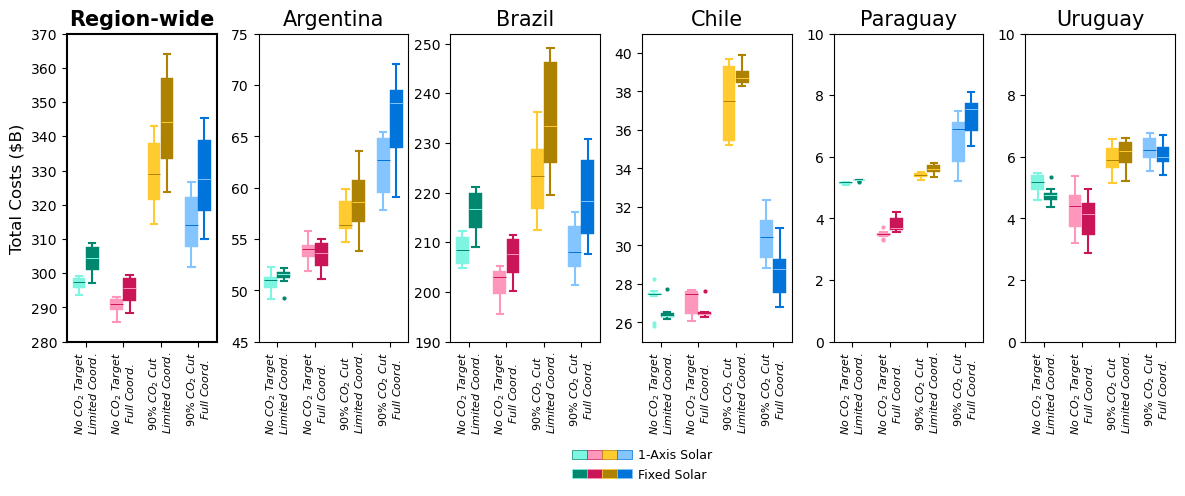

In [25]:
split_tx_cost_df = pd.read_csv('split_tx_cost_df80.csv')
my_colours = ['#7DF5E0','#008770','#FF96BC','#CA1658','#FFCB31','#AD8200','#84C5FF','#0074DA'] # [green,pink,yellow,blue]
med_colours = ['#008770','#7DF5E0','#CA1658','#FF96BC','#AD8200','#FFCB31','#0074DA','#84C5FF']
palette = {'000':'#FF669E','001':'#D81B60','010':'#10EFC9','011':'#004D40','100':'#63B6FF','101':'#0074DA','110':'#FFC107','111':'#AD8200'}
cap_tech = ['Wind','Solar','Hydro','Fossil']
panels = ['Region-wide'] + mercosur

plt.rcParams.update(plt.rcParamsDefault)
font = FontProperties()
font.set_name('Open Sans')
plt.rcParams["font.family"] = "Arial"

fig = plt.figure(constrained_layout=False, figsize = (14.3,4))
gs = fig.add_gridspec(1,6, width_ratios=[1,1,1,1,1,1], wspace=0.28)
cost_cols = ['new_total_cost']
cost_labels = ['Total Costs ($B)']
ylims = [[(280,370),(45,75),(190,252),(25,41),(0,10),(0,10)]]

# plot capacities
for i in range(len(cost_cols)):
    for j in range(len(panels)):
        ax = fig.add_subplot(gs[i,j])
        g = sns.boxplot(data=split_tx_cost_df[split_tx_cost_df.load_zone==panels[j]],x='pol',y=cost_cols[i],hue='fixed_pv', width=0.7,
                        medianprops={"linewidth": .7,'color':'k','label':'_median_','solid_capstyle':'butt'},saturation=1,
                        flierprops={"marker": "o",'markerfacecolor':'none','markeredgecolor':'k','markersize':2},
                        boxprops={"linewidth": .3,'edgecolor':'k'})#,whiskerprops={"linewidth": .7,'color':'k'},capprops={"linewidth": .7,'color':'k'})
        ax.legend([],frameon=False)
        boxes = ax.findobj(matplotlib.patches.PathPatch)
        for color, box in zip(my_colours, boxes):
            box.set_facecolor(color)
        box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
        if len(box_patches) == 0:
            box_patches = ax.artists
        num_patches = len(box_patches)
        if num_patches > 0:
            lines_per_boxplot = len(ax.lines) // num_patches
            for k, patch in enumerate(box_patches):
                col = patch.get_facecolor()
                patch.set_edgecolor(col)
                for line in ax.lines[k * lines_per_boxplot: (k + 1) * lines_per_boxplot]:
                    line.set_color(col)
                    line.set_mfc(col)  # facecolor of fliers
                    line.set_mec(col)  # edgecolor of fliers
            median_lines = [line for line in ax.get_lines() if line.get_label() == '_median_']
            for k, line in enumerate(median_lines):
                line.set_color(med_colours[k])
        ax.set_title(panels[j],fontsize=15)
        if j==0:
            ax.set_title(panels[j],fontsize=15,fontweight='bold')
            [x.set_linewidth(1.5) for x in ax.spines.values()]
            ax.set_ylabel(cost_labels[i],fontsize=12)
        else:
            ax.set_ylabel('')

        ax.set_xticklabels([r"${No\ CO_{2}\ Target}$"+'\n'+'$\it{Limited\ Coord.}$',r"${No\ CO_{2}\ Target}$"+'\n'+'$\it{Full\ Coord.}$',
                            r"$90\%\ CO_{2}\ Cut$"+'\n'+'$\it{Limited\ Coord.}$',r"$90\%\ CO_{2}\ Cut$"+'\n'+'$\it{Full\ Coord.}$'],
                            fontsize=8,rotation=90,linespacing=1)
        ax.set_xlabel('')
        ax.set_ylim(ylims[i][j])
pa1 = Patch(facecolor=my_colours[0], edgecolor=med_colours[0],linewidth=0.5)
pa2 = Patch(facecolor=my_colours[2], edgecolor=med_colours[2],linewidth=0.5)
pa3 = Patch(facecolor=my_colours[4], edgecolor=med_colours[4],linewidth=0.5)
pa4 = Patch(facecolor=my_colours[6], edgecolor=med_colours[6],linewidth=0.5)
pb1 = Patch(facecolor=my_colours[1], edgecolor=med_colours[1],linewidth=0.5)
pb2 = Patch(facecolor=my_colours[3], edgecolor=med_colours[3],linewidth=0.5)
pb3 = Patch(facecolor=my_colours[5], edgecolor=med_colours[5],linewidth=0.5)
pb4 = Patch(facecolor=my_colours[7], edgecolor=med_colours[7],linewidth=0.5)
ax.legend(handles=[pa1, pb1, pa2, pb2, pa3, pb3, pa4, pb4],
          labels=['', '', '', '', '', '', '1-Axis Solar', 'Fixed Solar'],
          ncol=4, handletextpad=0.5, handlelength=1.2, columnspacing=-0.5,
          loc='center', fontsize=9,frameon=False,bbox_to_anchor=(-2.56,-0.4))
plt.show()
#fig.savefig(figpath + 'country_total_costs.png', bbox_inches='tight', dpi=600)

In [84]:
# load_bal = pd.read_csv(respath+scs[0]+'/results/load_balance.csv')
# load_bal.timepoint = load_bal.timepoint.astype(str)
# load_bal = load_bal.set_index(['zone','period','timepoint'])
# load_bal['unmet_gw'] = (load_bal['unserved_energy_mw']*(load_bal['unserved_energy_mw']>0))/1000
# load_bal['scs'] = scs[0]
# load_bal = pd.DataFrame(load_bal[['unmet_gw','scs']])

# for i in range(1,len(scs)):
#     temp_lb=pd.read_csv(respath+scs[i]+'/results/load_balance.csv')
#     temp_lb.timepoint = temp_lb.timepoint.astype(str)
#     temp_lb = temp_lb.set_index(['zone','period','timepoint'])
#     temp_lb['unmet_gw'] = (temp_lb['unserved_energy_mw']*(temp_lb['unserved_energy_mw']>0))/1000
#     temp_lb['scs'] = scs[i]
#     temp_lb = pd.DataFrame(temp_lb[['unmet_gw','scs']])
#     load_bal = pd.concat([load_bal,temp_lb])
# load_bal.reset_index().to_csv('unmet_demand_hourly_tnt1.csv',index=False)

unmet_hr = pd.read_csv('unmet_demand_hourly_tnt1.csv') #units: GW or GWh
unmet_hr.timepoint = unmet_hr.timepoint.astype(str)
unmet_hr['Year'] = unmet_hr['timepoint'].str[:4].astype(int)
unmet_hr['Month'] = unmet_hr['timepoint'].str[4:6].astype(int)
unmet_hr['Hour'] = unmet_hr['timepoint'].str[6:].astype(int)
unmet0 = unmet_hr[unmet_hr.scs.isin([i for i in scs if 'cut90p' not in i])].copy(deep=True).drop(columns=['period','timepoint'])
unmet1 = unmet_hr[unmet_hr.scs.isin([i for i in scs if 'cut90p' in i])].copy(deep=True).drop(columns=['period','timepoint'])
unmet1

zone  unmet_gw                                        scs  Year  \
0       Argentina       0.0   prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  2020   
1       Argentina       0.0   prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  2020   
2       Argentina       0.0   prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  2020   
3       Argentina       0.0   prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  2020   
4       Argentina       0.0   prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  2020   
...           ...       ...                                        ...   ...   
393115    Uruguay       0.0  prm15_fix_wcost_re20_c2p1_co2_cut90p_tnt1  2050   
393116    Uruguay       0.0  prm15_fix_wcost_re20_c2p1_co2_cut90p_tnt1  2050   
393117    Uruguay       0.0  prm15_fix_wcost_re20_c2p1_co2_cut90p_tnt1  2050   
393118    Uruguay       0.0  prm15_fix_wcost_re20_c2p1_co2_cut90p_tnt1  2050   
393119    Uruguay       0.0  prm15_fix_wcost_re20_c2p1_co2_cut90p_tnt1  2050   

        Month  Hour  
0           1     1  
1           1     2  
2           1     3  
3           1     4  
4           1     5  
...       ...   ...  
393115     12    20  
393116     12    21  
393117     12    22  
393118     12    23  
393119     12    24  

[201600 rows x 6 columns]

In [85]:
unm0_2050 = unmet0[unmet0.Year==2050].groupby(['scs','Year','Month','Hour']).sum().reset_index()
unm1_2050 = unmet1[unmet1.Year==2050].groupby(['scs','Year','Month','Hour']).sum().reset_index()

df0_sw_2050 = unm0_2050.drop(columns=['scs']).groupby(['Year','Month','Hour']).mean().reset_index()
df1_sw_2050 = unm1_2050.drop(columns=['scs']).groupby(['Year','Month','Hour']).mean().reset_index()

pt0_sw_2050 = df0_sw_2050.pivot(index='Month',columns='Hour',values='unmet_gw')
pt1_sw_2050 = df1_sw_2050.pivot(index='Month',columns='Hour',values='unmet_gw')

pt1_sw_2050

Hour          1          2          3          4          5          6   \
Month                                                                     
1      35.899410  24.503898  17.147141  25.031695  22.038155  26.857162   
2      27.622282  20.856390  15.929950  18.623345  23.631906  22.254835   
3      17.251284  16.147330  16.897122  15.453475  18.497402  16.035446   
4       6.471962   5.861869   6.664129   6.383664   5.512392   4.514186   
5       6.987078   7.049530   7.779811   6.920619   5.374123   6.423744   
6       8.400985   8.231326   8.963187   9.286818   7.807845   5.733673   
7      11.931788  12.207245  10.916304   9.730531   8.870776   7.454788   
8      24.796239  15.936775  15.338320  18.895269  16.385538  17.991717   
9      22.375424  20.435987  14.558122  19.523598  17.516393  30.787541   
10     19.793972  21.674217  15.756142  17.061479  23.149822  21.648358   
11     21.560448  31.961680  27.326154  38.911100  36.978296  29.952174   
12     11.769720   9.759480  10.681216  10.267010   7.887782   8.052815   

Hour          7          8          9          10  ...         15         16  \
Month                                              ...                         
1      21.961991  31.395672  41.063739  35.092951  ...   7.119521  13.778221   
2      27.830684  27.161387  31.373093  43.489885  ...   3.632011   4.186413   
3      17.891426  14.690898  20.252290  18.621491  ...   3.307637   3.839409   
4       4.305606   4.828305   5.764598   5.980222  ...   0.000000   0.000000   
5       3.488832   5.121675   4.016348   6.745934  ...   0.000000   0.000000   
6       5.306608   6.874807   7.426118   8.396217  ...   0.000000   0.000000   
7       6.977051   8.206361   8.961280   9.226888  ...   3.072840   2.523795   
8      16.516704  22.415833  25.917413  18.905028  ...   0.019902   0.000000   
9      19.663876  24.512216  31.973149  18.236811  ...   1.579439   1.722260   
10     21.926130  19.940314  35.445682  25.319734  ...   2.962800   2.666318   
11     34.414668  31.447212  60.080145  31.164557  ...  12.621985  10.189392   
12      8.329223   8.178715   8.243504   8.226790  ...   0.000000   0.000000   

Hour          17        18         19         20         21         22  \
Month                                                                    
1       9.017612  6.737071   4.630750  18.140841  17.618564  18.076137   
2      10.795818  2.344262   2.579921   5.982559  16.551092  20.420449   
3       4.508585  1.612992   2.883522   3.482819  12.166979  13.143915   
4       0.000000  0.000000   0.000000   0.000000   0.706987   3.180570   
5       0.000000  0.000000   0.000000   0.362541   1.746164   2.815393   
6       0.000000  0.000000   0.000000   0.202776   1.400965   4.470913   
7       2.062095  2.018824   1.558614   2.428141   4.976650   7.370833   
8       0.000000  0.000000   0.208478   2.129238   5.907200  10.782854   
9       2.957782  0.631187   2.231469   4.759136  11.966461  11.951207   
10      0.991986  2.819632   1.881057   5.885255  14.313411   9.516743   
11     14.342584  9.761517  12.401468  20.784849  24.377946  36.454640   
12      0.000000  0.000000   0.000000   0.324410   1.862051   2.747740   

Hour          23         24  
Month                        
1      22.773543  23.564375  
2      15.139307  31.646793  
3      12.665917  24.629276  
4       6.394205   6.977838  
5       5.867151   6.801943  
6       8.602221   6.261297  
7      11.524953  10.093976  
8      15.359548  14.225508  
9      13.907608  17.284495  
10     17.455148  24.322376  
11     24.317433  28.188445  
12      4.779279   8.527186  

[12 rows x 24 columns]

In [86]:
hourly_disp

timepoint  load_zone  Battery_charge  Battery_discharge    Biomass  \
0        20200101  Argentina             0.0                0.0   0.034500   
1        20200101     Brazil             0.0                0.0  10.519575   
2        20200101      Chile             0.0                0.0   0.354000   
3        20200101   Paraguay             0.0                0.0   0.000000   
4        20200101    Uruguay             0.0                0.0   0.318750   
...           ...        ...             ...                ...        ...   
403195   20501224  Argentina             0.0                0.0   0.000000   
403196   20501224     Brazil             0.0                0.0   8.851650   
403197   20501224      Chile             0.0                0.0   0.354000   
403198   20501224   Paraguay             0.0                0.0   0.000000   
403199   20501224    Uruguay             0.0                0.0   0.269222   

        Coal  Diesel        Gas  Geothermal      Hydro  Nuclear  Solar  \
0        0.0     0.0   6.841165        0.00   5.976290    1.755    0.0   
1        0.0     0.0   3.150001        0.00  58.968614    1.990    0.0   
2        0.0     0.0   5.187000        0.04   2.683133    0.000    0.0   
3        0.0     0.0   0.000000        0.00   2.617700    0.000    0.0   
4        0.0     0.0   0.000000        0.00   0.542230    0.000    0.0   
...      ...     ...        ...         ...        ...      ...    ...   
403195   0.0     0.0  27.208218        0.00   5.698274    1.755    0.0   
403196   0.0     0.0  32.107960        0.00  64.473967    1.990    0.0   
403197   0.0     0.0  16.348248        0.04   5.063995    0.000    0.0   
403198   0.0     0.0   0.000000        0.00   8.132370    0.000    0.0   
403199   0.0     0.0   0.000000        0.00   0.405254    0.000    0.0   

             Wind      load      curt  \
0        1.013670   15.8365  0.000000   
1        0.936810   75.5650  0.000000   
2        1.579410    9.8445  0.000000   
3        0.000000    2.6167  0.000000   
4        0.953820    1.5838  0.000000   
...           ...       ...       ...   
403195   8.924517   43.2649  0.000000   
403196  66.786723  174.4558  0.000000   
403197   0.000000   21.8072  0.000000   
403198   3.073630   11.2050  1.999052   
403199   4.051040    4.7415  0.000000   

                                             scs  
0       prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  
1       prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  
2       prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  
3       prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  
4       prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  
...                                          ...  
403195            prm15_fix_wcost_re20_c2p1_tnt1  
403196            prm15_fix_wcost_re20_c2p1_tnt1  
403197            prm15_fix_wcost_re20_c2p1_tnt1  
403198            prm15_fix_wcost_re20_c2p1_tnt1  
403199            prm15_fix_wcost_re20_c2p1_tnt1  

[403200 rows x 16 columns]

In [87]:
dfc = hourly_disp[['scs','timepoint','load_zone','curt']].copy(deep=True)
dfc['curt']
dfc.timepoint = dfc.timepoint.astype(str)
dfc['Year'] = dfc['timepoint'].str[:4].astype(int)
dfc['Month'] = dfc['timepoint'].str[4:6].astype(int)
dfc['Hour'] = dfc['timepoint'].str[6:].astype(int)

dfc0 = dfc[dfc.scs.isin([i for i in scs if 'cut90p' not in i])].copy(deep=True)
dfc1 = dfc[dfc.scs.isin([i for i in scs if 'cut90p' in i])].copy(deep=True)

dfc0_sw_2050 = dfc0[dfc0.Year==2050].groupby(['scs','timepoint','Year','Month','Hour']).sum().reset_index()
dfc1_sw_2050 = dfc1[dfc1.Year==2050].groupby(['scs','timepoint','Year','Month','Hour']).sum().reset_index()
dfc0_sw_2050 = dfc0_sw_2050.drop(columns=['scs']).groupby(['Year','Month','Hour']).mean().reset_index()
dfc1_sw_2050 = dfc1_sw_2050.drop(columns=['scs']).groupby(['Year','Month','Hour']).mean().reset_index()

dfc0_pt = dfc0_sw_2050.pivot(index='Month',columns='Hour',values='curt')
dfc1_pt = dfc1_sw_2050.pivot(index='Month',columns='Hour',values='curt')
dfc1_pt

Hour          1          2          3          4          5          6   \
Month                                                                     
1      23.049550  32.721593  32.697659  32.263688  31.687331  30.013785   
2      13.086390  24.324177  24.841396  26.732956  26.879770  25.194129   
3       1.153877   6.582481   7.874775   8.581352   8.401889   7.794018   
4      23.877639  31.983460  38.379426  35.427305  36.170706  36.546144   
5      19.272585  30.309959  30.752181  32.196336  32.230145  34.620573   
6      10.948300  20.161677  20.083814  21.927039  24.916092  24.209634   
7       2.622540   8.195778   8.484986   9.225450   8.753576   8.592982   
8      22.832043  34.063994  36.445089  37.504296  38.089441  36.233872   
9       8.405464  20.859056  23.146355  25.997785  25.276224  25.032306   
10     18.214584  29.776836  31.646379  31.325023  32.088484  31.881118   
11     20.444564  29.227548  27.941923  29.297052  28.350449  28.459940   
12     18.721693  28.933177  29.202780  28.544951  32.066378  30.585194   

Hour          7          8          9          10  ...         15         16  \
Month                                              ...                         
1      28.723635  25.794570  19.657195  18.320484  ...  20.456811  21.239105   
2      23.775075  21.047794  15.136923  11.826511  ...  10.763192  14.095113   
3       6.242475   4.469428   1.292334   0.113354  ...   5.487660   5.629250   
4      29.527605  27.620095  26.188968  20.439147  ...  33.428886  37.006904   
5      32.119163  28.868610  26.123546  22.486463  ...  21.630691  24.169839   
6      21.723700  18.202178  15.775140  14.298749  ...  30.962032  30.878895   
7       8.018409   6.462581   3.843523   2.430843  ...  16.701032  14.341405   
8      34.293119  32.847618  29.300914  27.069224  ...  33.516945  28.856896   
9      22.325993  19.694396  15.885482  12.551078  ...  11.769551  12.047912   
10     29.831904  27.188994  23.617801  20.335206  ...  23.328715  22.014062   
11     26.480705  25.881693  21.169729  15.961899  ...  19.297217  21.860836   
12     29.829208  28.234437  21.388069  19.386086  ...  25.033690  19.336704   

Hour          17         18         19         20         21         22  \
Month                                                                     
1      21.944086  20.454286  24.495586  21.986042  23.030667  20.754107   
2      11.446745  17.707924  19.530673  13.873588  13.335317   9.859347   
3       3.742501   4.270083   2.673548   1.872278   0.411771   0.081471   
4      34.520893  36.032007  37.583783  32.157319  24.694463  21.448679   
5      26.578070  29.047232  30.404748  25.415218  18.157987  17.740110   
6      26.084119  29.754977  19.969113  16.261404   9.258200  11.940470   
7      10.699902  14.260286   7.891806   5.617492   3.448069   2.317305   
8      25.950769  31.488835  27.081401  25.159686  15.900226  17.296085   
9      11.652760  16.865344  15.747976  14.915770  11.733999   5.497731   
10     23.633087  28.613128  30.547355  24.996990  20.585438  15.503564   
11     24.070031  26.726705  29.201366  27.433838  26.318475  24.881746   
12     21.943324  26.619656  25.106494  25.654439  24.562204  21.791626   

Hour          23         24  
Month                        
1      23.308001  26.831395  
2      11.040294  16.459769  
3       0.207597   0.288271  
4      17.547784  24.941165  
5      21.518641  23.685043  
6       9.698035  13.161212  
7       3.449925   0.979471  
8      15.142907  22.073128  
9       6.450660  10.802448  
10     13.316583  17.860766  
11     25.284159  23.983758  
12     20.319665  18.955265  

[12 rows x 24 columns]

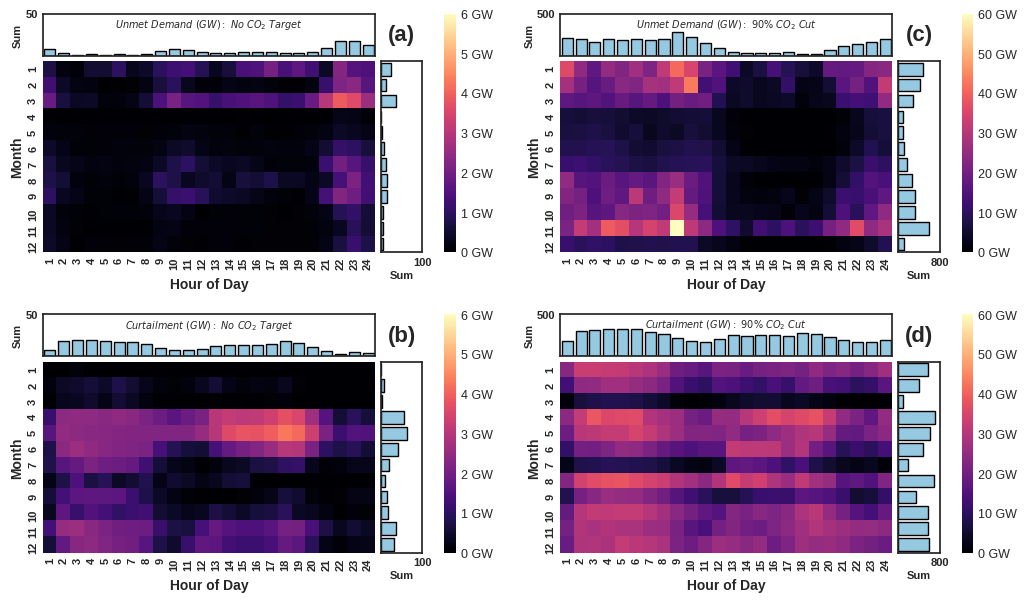

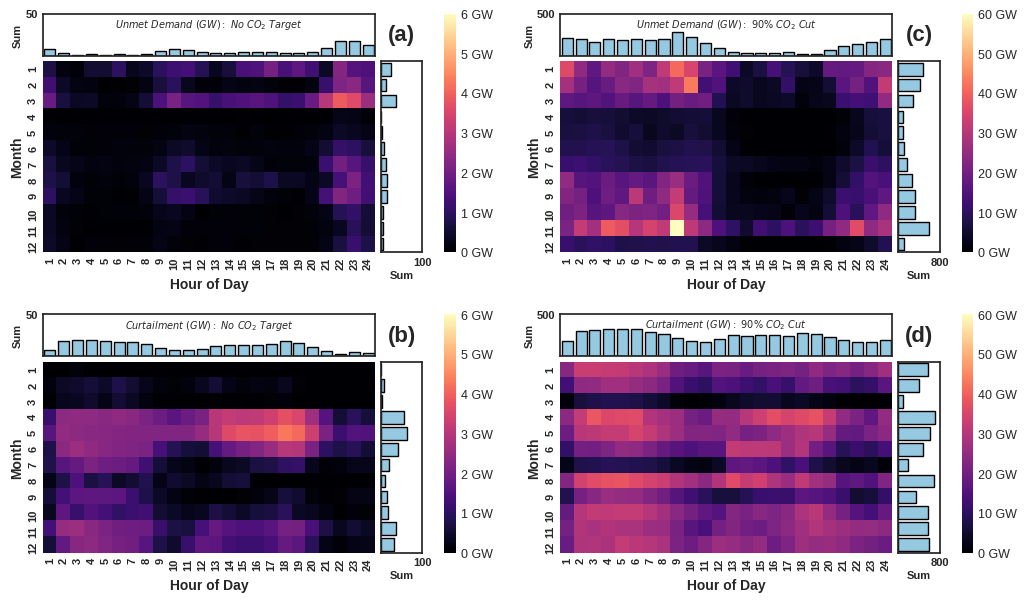

In [99]:
### heatmap with unmet demand and curtailment ###
df_list = [pt0_sw_2050,dfc0_pt,pt1_sw_2050,dfc1_pt]

# hard-coded limits for plotting
monthly_lims,moticks=[100,100,800,800],[100,100,800,800]
day_lims,dayticks=[50,50,500,500],[50,50,500,500]
colorbar_maxes=[6,6,60,60]
hr, wr, ws, hs = [1,4.5], [8,1], 0.032, 0.045
labs = [r"$Unmet\ Demand\ (GW):\ $"+r"${No\ CO_{2}\ Target}$",r"$Curtailment\ (GW):\ $"+r"${No\ CO_{2}\ Target}$",
        r"$Unmet\ Demand\ (GW):\ $"+r"$90\%\ CO_{2}\ Cut$",r"$Curtailment\ (GW):\ $"+r"$90\%\ CO_{2}\ Cut$"]
maps=['magma','magma','magma','magma']
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-white')
fig = plt.figure(constrained_layout=False, figsize = (12,7))
gs = fig.add_gridspec(2,5, width_ratios=[1,0.03,0.16,1,0.03], height_ratios=[1,1], wspace = .13, hspace= .26)
gs00 = gs[0,0].subgridspec(2,2, height_ratios=hr, width_ratios=wr, wspace=ws,hspace=hs)
gs10 = gs[1,0].subgridspec(2,2, height_ratios=hr, width_ratios=wr, wspace=ws,hspace=hs)
gs02 = gs[0,3].subgridspec(2,2, height_ratios=hr, width_ratios=wr, wspace=ws,hspace=hs)
gs12 = gs[1,3].subgridspec(2,2, height_ratios=hr, width_ratios=wr, wspace=ws,hspace=hs)
gslist = [gs00,gs10,gs02,gs12]
ax_cb1,ax_cb2,ax_cb3,ax_cb4=fig.add_subplot(gs[0,1]),fig.add_subplot(gs[1,1]),fig.add_subplot(gs[0,4]),fig.add_subplot(gs[1,4])
cb_list = [ax_cb1,ax_cb2,ax_cb3,ax_cb4]
panel_labels = ['(a)','(b)','(c)','(d)']
fmt_strs = ["{:.0f} GW","{:.0f} GW","{:.0f} GW","{:.0f} GW"]
for y in range(len(gslist)):
    df = df_list[y]
    hourly_values = df.sum(axis=0).reset_index().rename(columns={'Hour':'Hour',0:'Sum'})
    monthly_values = df.sum(axis=1).reset_index().rename(columns={'Month':'Month',0:'Sum'})
    ax_hm = fig.add_subplot(gslist[y][1,0])   #axes for heatmap
    ax_hr = fig.add_subplot(gslist[y][0,0])   #axes for hour bars
    ax_mo = fig.add_subplot(gslist[y][1,1])   #axes for month bars
    ax_lg = fig.add_subplot(gslist[y][0,1])
    ax_lg.axis('off')
    heatmap = sns.heatmap(df, ax=ax_hm, cbar_ax=cb_list[y], annot=False, vmin=0, vmax=colorbar_maxes[y], fmt='.0f',\
                          xticklabels=np.arange(1,25),yticklabels=np.arange(1,13), cmap=maps[y])
    hour_bars = sns.barplot(x='Hour', y='Sum',data=hourly_values, ax=ax_hr, color='#88CCEE', edgecolor='k', orient='v')
    month_bars = sns.barplot(x='Sum', y='Month',data=monthly_values, ax=ax_mo, color='#88CCEE', edgecolor='k', orient='h')
    
    heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 8, fontweight='bold')
    heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 8, fontweight='bold')
    heatmap.set_xlabel('Hour of Day', fontsize=10, fontweight='bold',labelpad=6)
    heatmap.set_ylabel('Month', fontsize=10, fontweight='bold',labelpad=3)
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=9)
    t = cbar.get_ticks().tolist()
    cbar.set_ticks(t)
    cbar.set_ticklabels([fmt_strs[y].format(i) for i in t])
    ax_hr.get_xaxis().set_visible(False)
    ax_hr.set_ylim(0,day_lims[y])
    ax_hr.set_yticks([dayticks[y]])
    ax_hr.set_yticklabels([str(dayticks[y])], fontsize=8, fontweight='bold')
    ax_hr.set_ylabel('Sum', fontsize=8, fontweight='bold',labelpad=2)
    ax_mo.get_yaxis().set_visible(False)
    ax_mo.set_xlim(0,monthly_lims[y])
    ax_mo.set_xticks([moticks[y]])
    ax_mo.set_xticklabels([str(moticks[y])], fontsize=8, fontweight='bold')
    ax_mo.set_xlabel('Sum', fontsize=8, fontweight='bold',labelpad=2)
    ax_hr.annotate(str(labs[y]),(.5,.75),xycoords='axes fraction',annotation_clip=False,
                        ha='center',va='center',fontsize=7)
    ax_lg.annotate(panel_labels[y],(.5,.5),xycoords='axes fraction',annotation_clip=False,
                        fontweight='bold',ha='center',va='center',fontsize=16)
plt.show()
#plt.savefig(figpath + 'heatmap_unmet_curt_tnt1.png',facecolor='w',bbox_inches='tight',dpi=600)

In [89]:
unmet1.groupby(['zone','Year']).sum().reset_index().drop(columns=['Month','Hour'])

zone  Year      unmet_gw
0   Argentina  2020      0.000000
1   Argentina  2025     54.008596
2   Argentina  2030      0.000000
3   Argentina  2035     48.346743
4   Argentina  2040   1094.892305
5   Argentina  2045   1375.394979
6   Argentina  2050    763.564301
7      Brazil  2020  15980.893261
8      Brazil  2025   9394.965649
9      Brazil  2030   8768.147496
10     Brazil  2035   7502.297933
11     Brazil  2040  10943.940743
12     Brazil  2045  27577.247383
13     Brazil  2050  32420.903379
14      Chile  2020    313.548780
15      Chile  2025    416.579473
16      Chile  2030    154.347888
17      Chile  2035   1464.037195
18      Chile  2040   3364.990768
19      Chile  2045   7149.160393
20      Chile  2050  31746.143563
21   Paraguay  2020      0.000000
22   Paraguay  2025      0.000000
23   Paraguay  2030      0.000000
24   Paraguay  2035      0.000000
25   Paraguay  2040      0.000000
26   Paraguay  2045     34.732590
27   Paraguay  2050     65.291506
28    Uruguay  2020      0.000000
29    Uruguay  2025      0.000000
30    Uruguay  2030      0.000000
31    Uruguay  2035    351.689428
32    Uruguay  2040    475.129576
33    Uruguay  2045    212.857339
34    Uruguay  2050     91.889025

In [33]:
unmet1

zone  unmet_gw                                        scs  Year  \
0       Argentina       0.0   prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  2020   
1       Argentina       0.0   prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  2020   
2       Argentina       0.0   prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  2020   
3       Argentina       0.0   prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  2020   
4       Argentina       0.0   prm15_fix_wcost_re1_c2p1_co2_cut90p_tnt1  2020   
...           ...       ...                                        ...   ...   
393115    Uruguay       0.0  prm15_fix_wcost_re20_c2p1_co2_cut90p_tnt1  2050   
393116    Uruguay       0.0  prm15_fix_wcost_re20_c2p1_co2_cut90p_tnt1  2050   
393117    Uruguay       0.0  prm15_fix_wcost_re20_c2p1_co2_cut90p_tnt1  2050   
393118    Uruguay       0.0  prm15_fix_wcost_re20_c2p1_co2_cut90p_tnt1  2050   
393119    Uruguay       0.0  prm15_fix_wcost_re20_c2p1_co2_cut90p_tnt1  2050   

        Month  Hour  
0           1     1  
1           1     2  
2           1     3  
3           1     4  
4           1     5  
...       ...   ...  
393115     12    20  
393116     12    21  
393117     12    22  
393118     12    23  
393119     12    24  

[201600 rows x 6 columns]